<h1><center>Students Performance In Exams Portfolio Project</center></h1>

<h1><center>A. Data Profiling</center></h1>

What’s data profiling?
> **Data Profiling** is summarizing data using descriptive statistics. Creating data profiling aims to have a strong understanding of data to compile framework analysis and visualize data.

First, I need to understand the data first. So I’ll do data profiling to get a better data understanding.

## 1. Importing Library

In [126]:
import numpy as np
import pandas as pd
pd.set_option('display.max_columns',None)
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import re
from datetime import datetime, date

print('numpy version : ',np.__version__)
print('pandas version : ',pd.__version__)
print('seaborn version : ',sns.__version__)

numpy version :  1.21.5
pandas version :  1.4.4
seaborn version :  0.11.2


## 2. Importing Data

The second step is initializing the library, importing the dataset into python using **Pandas**, and assigning it as **df**. The data will be saved as **‘HousePrice.csv’**.

In [127]:
df = pd.read_csv('StudentsPerformance.csv')
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


## 3. Showing The Length of The Data

In [128]:
print("The Length of The Data:", len(df))

The Length of The Data: 1000


The third step is to **display how much data on the dataset** using **len()**. The result is the size of this data is **1000**.

## 4. Showing The Shape of The Data

In [129]:
print("The Shape of The Data: ", df.shape)

The Shape of The Data:  (1000, 8)


The fourth step is to **display how many rows and columns in the data** use **.shape**. The result is this data has **1000 rows and 8 columns**.

## 5. Showing The Information of The Data

In [130]:
print("The Information of The Data: \n", df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB
The Information of The Data: 
 None


The fifth step is to **get information from the data about what kind of type for each column** using the **.info()**. As you can see, there are three types of data: **object and int64**.

## 6. Checking The Outliers

Outliers are extreme values that stand out significantly from the overall pattern of values in a dataset or graph.

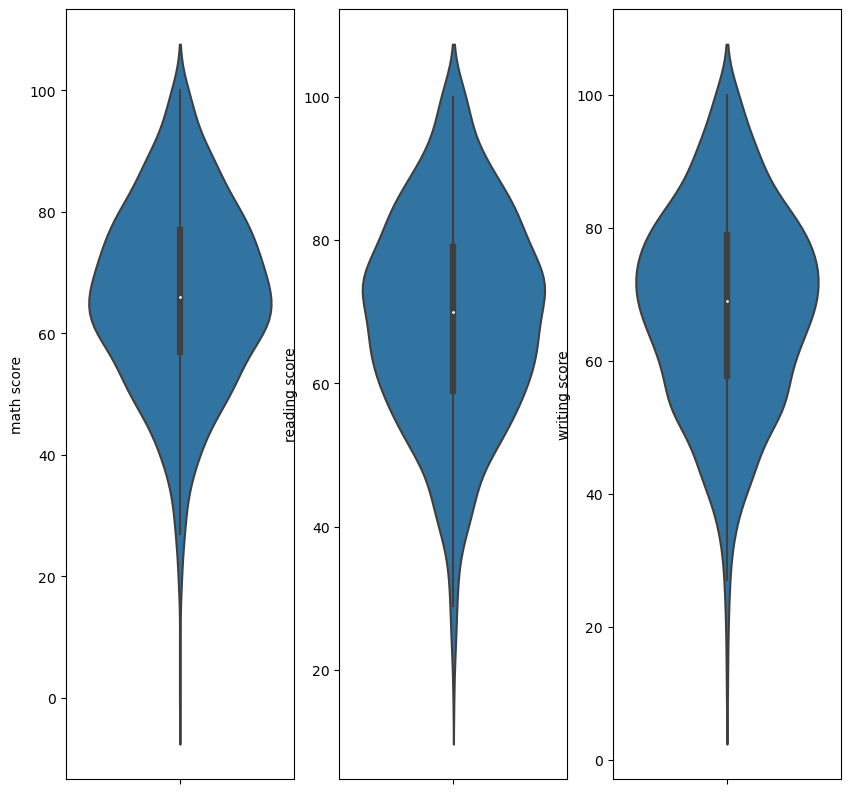

In [131]:
nums = ['math score', 
        'reading score', 
        'writing score']

from matplotlib.gridspec import GridSpec    
fig = plt.figure(figsize=(10, 10))
grid = GridSpec(ncols=3, nrows=1, figure=fig)
for i, name in enumerate(nums):
    ax = fig.add_subplot(grid[i])
    sns.violinplot(y = df[nums[i]], orient='v')
plt.show()

<h1><center>B. Data Cleansing</center></h1>

After data profiling, I'll do data cleansing. What's data cleansing?
> **Data cleansing** is identifying incorrect, incomplete, inaccurate, irrelevant, or missing data and then modifying, replacing, or deleting them according to the need.

<h2><center>B.1. Checking The gender Column</center></h2>

The gender column containing the gender of the students.

### Renaming The Column's Name

In [132]:
df.rename(columns ={'gender': 'Gender'}, inplace=True)

### Changing The Writing of The Value in The Gender Column

In [133]:
df['Gender'] = df['Gender'].str.title()

### Checking The Number of Gender

In [134]:
print("Here are the number of Gender that exist in this dataset:")
df_gender = pd.DataFrame({'Amount' : df.groupby(["Gender"]).size()}).reset_index().sort_values(by= 'Amount', ascending=True)
df_gender

Here are the number of Gender that exist in this dataset:


,Gender,Amount
1,Male,482
0,Female,518


### Checking The Description of The Gender Column

In [135]:
df["Gender"].describe().to_frame().T

,count,unique,top,freq
Gender,1000,2,Female,518


Students with female sex dominate in this data with 518.

### Checking The Missing Value in The Gender Column

In [136]:
missing_value_Gender = df["Gender"].isnull().sum()
if missing_value_Gender > 0:
    print("There are " + str(missing_value_Gender) + " missing values in this column.")
else:
    print("There is no missing values in this column.")

There is no missing values in this column.


<h2><center>B.2. Checking The race/ethnicity Column</center></h2>

The race/ethnicity column containing the race/ethnicity of the student.

### Renaming The Column's Name

In [137]:
df.rename(columns ={'race/ethnicity': 'Race/Ethnicity'}, inplace=True)

### Changing The Writing of The Value in The Race/Ethnicity Column

In [138]:
df['Race/Ethnicity'] = df['Race/Ethnicity'].str.title()

### Checking The Number of Race/Ethnicity

In [139]:
print("Here are the number of Race/Ethnicity that exist in this dataset:")
df_race = pd.DataFrame({'Amount' : df.groupby(["Race/Ethnicity"]).size()}).reset_index().sort_values(by= 'Amount', ascending=False)
df_race

Here are the number of Race/Ethnicity that exist in this dataset:


,Race/Ethnicity,Amount
2,Group C,319
3,Group D,262
1,Group B,190
4,Group E,140
0,Group A,89


### Checking The Description of The Race/Ethnicity Column

In [140]:
df["Race/Ethnicity"].describe().to_frame().T

,count,unique,top,freq
Race/Ethnicity,1000,5,Group C,319


Students with Group C race/ethnicity dominate in this data with 319.

### Checking The Missing Value in The Race/Ethnicity Column

In [141]:
missing_value_race = df["Race/Ethnicity"].isnull().sum()
if missing_value_race > 0:
    print("There are " + str(missing_value_race) + " missing values in this column.")
else:
    print("There is no missing values in this column.")

There is no missing values in this column.


<h2><center>B.3. Checking The parental level of education Column</center></h2>

The parental level of education column containing the parent's education for each student.

### Renaming The Column's Name

In [142]:
df.rename(columns ={'parental level of education': 'Parent\'s Education'}, inplace=True)

### Changing The Writing of The Value in The Parent's Education Column

In [143]:
mask_parent = {'some college':"Some College", 'associate\'s degree':"Associate\'s Degree", 
               'high school':"High School", 'some high school':"Some High School", 
               'bachelor\'s degree':"Bachelor\'s Degree", 'master\'s degree':"Master\'s Degree", }
df['Parent\'s Education'] = df['Parent\'s Education'].map(mask_parent)

### Checking The Number of Parent\'s Education

In [144]:
print("Here are the number of Parent\'s Education that exist in this dataset:")
df_parent = pd.DataFrame({'Amount' : df.groupby(["Parent\'s Education"]).size()}).reset_index().sort_values(by= 'Amount', ascending=False)
df_parent

Here are the number of Parent's Education that exist in this dataset:


,Parent's Education,Amount
4,Some College,226
0,Associate's Degree,222
2,High School,196
5,Some High School,179
1,Bachelor's Degree,118
3,Master's Degree,59


### Checking The Description of The Parent's Education Column

In [145]:
df["Parent's Education"].describe().to_frame().T

,count,unique,top,freq
Parent's Education,1000,6,Some College,226


### Checking The Missing Value in The Parent's Education Column

In [146]:
missing_value_Parents_Education = df["Parent\'s Education"].isnull().sum()
if missing_value_Parents_Education > 0:
    print("There are " + str(missing_value_Parents_Education) + " missing values in this column.")
else:
    print("There is no missing values in this column.")

There is no missing values in this column.


<h2><center>B.4. Checking The lunch Column</center></h2>

The lunch column containing the lunch type for each student.

### Renaming The Column's Name

In [147]:
df.rename(columns ={'lunch': 'Lunch'}, inplace=True)

### Changing The Writing of The Value in The Parent's Education Column

In [148]:
df['Lunch'] = df['Lunch'].str.title()

### Checking The Number of Lunch

In [149]:
print("Here are the number of Lunch that exist in this dataset:")
df_lunch = pd.DataFrame({'Amount' : df.groupby(["Lunch"]).size()}).reset_index().sort_values(by= 'Amount', ascending=False)
df_lunch

Here are the number of Lunch that exist in this dataset:


,Lunch,Amount
1,Standard,645
0,Free/Reduced,355


### Checking The Description of The Lunch Column

In [150]:
df["Lunch"].describe().to_frame().T

,count,unique,top,freq
Lunch,1000,2,Standard,645


### Checking The Missing Value in The Lunch Column

In [151]:
missing_value_Lunch = df["Lunch"].isnull().sum()
if missing_value_Lunch > 0:
    print("There are " + str(missing_value_Lunch) + " missing values in this column.")
else:
    print("There is no missing values in this column.")

There is no missing values in this column.


<h2><center>B.5. Checking The test preparation course Column</center></h2>

The test preparation course column containing the test preparation course status for each student.

### Renaming The Column's Name

In [152]:
df.rename(columns ={'test preparation course': 'Test Preparation Course'}, inplace=True)

### Changing The Writing of The Value in The Test Preparation Course Column

In [153]:
df['Test Preparation Course'] = df['Test Preparation Course'].str.title()

### Checking The Number of Test Preparation Course

In [154]:
print("Here are the number of Test Preparation Course that exist in this dataset:")
df_preparation = pd.DataFrame({'Amount' : df.groupby(["Test Preparation Course"]).size()}).reset_index().sort_values(by= 'Amount', ascending=False)
df_preparation

Here are the number of Test Preparation Course that exist in this dataset:


,Test Preparation Course,Amount
1,None,642
0,Completed,358


### Checking The Description of The Test Preparation Course Column

In [155]:
df["Test Preparation Course"].describe().to_frame().T

,count,unique,top,freq
Test Preparation Course,1000,2,None,642


### Checking The Missing Value in The Test Preparation Course Column

In [156]:
missing_value_preparation = df["Test Preparation Course"].isnull().sum()
if missing_value_preparation > 0:
    print("There are " + str(missing_value_preparation) + " missing values in this column.")
else:
    print("There is no missing values in this column.")

There is no missing values in this column.


<h2><center>B.6. Checking The math score Column</center></h2>

The math score column containing the math score for each student.

### Renaming The Column's Name

In [157]:
df.rename(columns ={'math score': 'Math Score'}, inplace=True)

### Checking The Description of The Math Score Column

In [158]:
df["Math Score"].describe().to_frame().T

,count,mean,std,min,25%,50%,75%,max
Math Score,1000.0,66.089,15.16308,0.0,57.0,66.0,77.0,100.0


### Checking The Missing Value in The Math Score Column

In [159]:
missing_value_math = df["Math Score"].isnull().sum()
if missing_value_math > 0:
    print("There are " + str(missing_value_math) + " missing values in this column.")
else:
    print("There is no missing values in this column.")

There is no missing values in this column.


<h2><center>B.7. Checking The reading score Column</center></h2>

The reading score column containing the reading score for each student.

### Renaming The Column's Name

In [160]:
df.rename(columns ={'reading score': 'Reading Score'}, inplace=True)

### Checking The Description of The Reading Score Column

In [161]:
df["Reading Score"].describe().to_frame().T

,count,mean,std,min,25%,50%,75%,max
Reading Score,1000.0,69.169,14.600192,17.0,59.0,70.0,79.0,100.0


### Checking The Missing Value in The Reading Score Column

In [162]:
missing_value_reading = df["Reading Score"].isnull().sum()
if missing_value_reading > 0:
    print("There are " + str(missing_value_reading) + " missing values in this column.")
else:
    print("There is no missing values in this column.")

There is no missing values in this column.


<h2><center>B.8. Checking The writing score Column</center></h2>

The writing score column containing the writing score for each student.

### Renaming The Column's Name

In [163]:
df.rename(columns ={'writing score': 'Writing Score'}, inplace=True)

### Checking The Description of The Writing Score Column

In [164]:
df["Writing Score"].describe().to_frame().T

,count,mean,std,min,25%,50%,75%,max
Writing Score,1000.0,68.054,15.195657,10.0,57.75,69.0,79.0,100.0


### Checking The Missing Value in The Writing Score Column

In [165]:
missing_value_writing = df["Writing Score"].isnull().sum()
if missing_value_writing > 0:
    print("There are " + str(missing_value_writing) + " missing values in this column.")
else:
    print("There is no missing values in this column.")

There is no missing values in this column.


<h2><center>B.9. Creating The Math Passed Column</center></h2>

Creating a new column that contains a status if the students either passed or not in the mathematic subject.

In [166]:
df['Math Passed'] = np.where(df['Math Score'] < 70, "Not Passed", "Passed")
df.head()

,Gender,Race/Ethnicity,Parent's Education,Lunch,Test Preparation Course,Math Score,Reading Score,Writing Score,Math Passed
0,Female,Group B,Bachelor's Degree,Standard,None,72,72,74,Passed
1,Female,Group C,Some College,Standard,Completed,69,90,88,Not Passed
2,Female,Group B,Master's Degree,Standard,None,90,95,93,Passed
3,Male,Group A,Associate's Degree,Free/Reduced,None,47,57,44,Not Passed
4,Male,Group C,Some College,Standard,None,76,78,75,Passed


In [167]:
print("Here are the number of student who passed the math subject that exist in this dataset:")
df_math_passed = pd.DataFrame({'Amount' : df.groupby(["Math Passed"]).size()}).reset_index().sort_values(by= 'Amount', ascending=False)
df_math_passed

Here are the number of student who passed the math subject that exist in this dataset:


,Math Passed,Amount
0,Not Passed,591
1,Passed,409


<h2><center>B.10. Creating The Reading Passed Column</center></h2>

Creating a new column that contains a status if the students either passed or not in the reading subject.

In [168]:
df['Reading Passed'] = np.where(df['Reading Score'] < 70, "Not Passed", "Passed")
df.head()

,Gender,Race/Ethnicity,Parent's Education,Lunch,Test Preparation Course,Math Score,Reading Score,Writing Score,Math Passed,Reading Passed
0,Female,Group B,Bachelor's Degree,Standard,None,72,72,74,Passed,Passed
1,Female,Group C,Some College,Standard,Completed,69,90,88,Not Passed,Passed
2,Female,Group B,Master's Degree,Standard,None,90,95,93,Passed,Passed
3,Male,Group A,Associate's Degree,Free/Reduced,None,47,57,44,Not Passed,Not Passed
4,Male,Group C,Some College,Standard,None,76,78,75,Passed,Passed


In [169]:
print("Here are the number of student who passed the reading subject that exist in this dataset:")
df_read_passed = pd.DataFrame({'Amount' : df.groupby(["Reading Passed"]).size()}).reset_index().sort_values(by= 'Amount', ascending=False)
df_read_passed

Here are the number of student who passed the reading subject that exist in this dataset:


,Reading Passed,Amount
1,Passed,513
0,Not Passed,487


<h2><center>B.11. Creating The Writing Passed Column</center></h2>

Creating a new column that contains a status if the students either passed or not in the writing subject.

In [170]:
df['Writing Passed'] = np.where(df['Writing Score'] < 70, "Not Passed", "Passed")
df.head()

,Gender,Race/Ethnicity,Parent's Education,Lunch,Test Preparation Course,Math Score,Reading Score,Writing Score,Math Passed,Reading Passed,Writing Passed
0,Female,Group B,Bachelor's Degree,Standard,None,72,72,74,Passed,Passed,Passed
1,Female,Group C,Some College,Standard,Completed,69,90,88,Not Passed,Passed,Passed
2,Female,Group B,Master's Degree,Standard,None,90,95,93,Passed,Passed,Passed
3,Male,Group A,Associate's Degree,Free/Reduced,None,47,57,44,Not Passed,Not Passed,Not Passed
4,Male,Group C,Some College,Standard,None,76,78,75,Passed,Passed,Passed


In [171]:
print("Here are the number of student who passed the writing subject that exist in this dataset:")
df_write_passed = pd.DataFrame({'Amount' : df.groupby(["Writing Passed"]).size()}).reset_index().sort_values(by= 'Amount', ascending=False)
df_write_passed

Here are the number of student who passed the writing subject that exist in this dataset:


,Writing Passed,Amount
0,Not Passed,511
1,Passed,489


<h2><center>B.12. Creating The All Subject Passed Column</center></h2>

In [172]:
df['All Subject Passed'] = np.where((df['Math Passed'] == "Passed") & (df['Reading Passed'] == "Passed") & (df['Writing Passed'] == "Passed"), "Passed", "Not Passed")
df.head()

,Gender,Race/Ethnicity,Parent's Education,Lunch,Test Preparation Course,Math Score,Reading Score,Writing Score,Math Passed,Reading Passed,Writing Passed,All Subject Passed
0,Female,Group B,Bachelor's Degree,Standard,None,72,72,74,Passed,Passed,Passed,Passed
1,Female,Group C,Some College,Standard,Completed,69,90,88,Not Passed,Passed,Passed,Not Passed
2,Female,Group B,Master's Degree,Standard,None,90,95,93,Passed,Passed,Passed,Passed
3,Male,Group A,Associate's Degree,Free/Reduced,None,47,57,44,Not Passed,Not Passed,Not Passed,Not Passed
4,Male,Group C,Some College,Standard,None,76,78,75,Passed,Passed,Passed,Passed


In [173]:
all_passed = pd.DataFrame({'Amount' : df.groupby(["All Subject Passed"]).size()}).sort_values(by= 'All Subject Passed', ascending=False).reset_index()
all_passed["Percent"] = (all_passed["Amount"]/len(df))*100
print("The Number of Student Who Passed All of The Subject Is " + str(all_passed["Amount"][0]) + " Or " + "%.1f" % all_passed["Percent"][0] + "%.")
all_passed

The Number of Student Who Passed All of The Subject Is 324 Or 32.4%.


,All Subject Passed,Amount,Percent
0,Passed,324,32.4
1,Not Passed,676,67.6


<h2><center>C. Data Exploration</center></h2>

In [174]:
df.head()

,Gender,Race/Ethnicity,Parent's Education,Lunch,Test Preparation Course,Math Score,Reading Score,Writing Score,Math Passed,Reading Passed,Writing Passed,All Subject Passed
0,Female,Group B,Bachelor's Degree,Standard,None,72,72,74,Passed,Passed,Passed,Passed
1,Female,Group C,Some College,Standard,Completed,69,90,88,Not Passed,Passed,Passed,Not Passed
2,Female,Group B,Master's Degree,Standard,None,90,95,93,Passed,Passed,Passed,Passed
3,Male,Group A,Associate's Degree,Free/Reduced,None,47,57,44,Not Passed,Not Passed,Not Passed,Not Passed
4,Male,Group C,Some College,Standard,None,76,78,75,Passed,Passed,Passed,Passed


### Looking For The Number of Gender

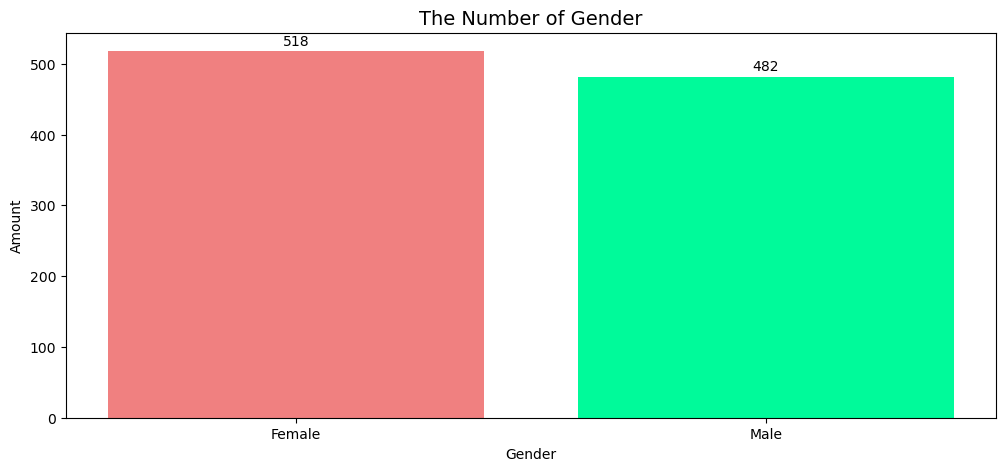

In [175]:
col = df["Gender"]
colValue = col.value_counts()

plt.figure(figsize = (12, 5))
plt.bar(colValue.index, colValue, color = ["lightcoral", "mediumspringgreen", "bisque", "paleturquoise", "plum", "ivory"])
plt.xticks(colValue.index, colValue.index.values)
plt.title("The Number of Gender", fontsize = 14)
plt.ylabel("Amount", fontsize = 10)
plt.xlabel("Gender", fontsize = 10)
plt.text(x = "Female", y = 526, s = "518", ha='center',fontsize = 10)
plt.text(x = 'Male', y = 490, s = "482", ha='center',fontsize = 10)
plt.show()

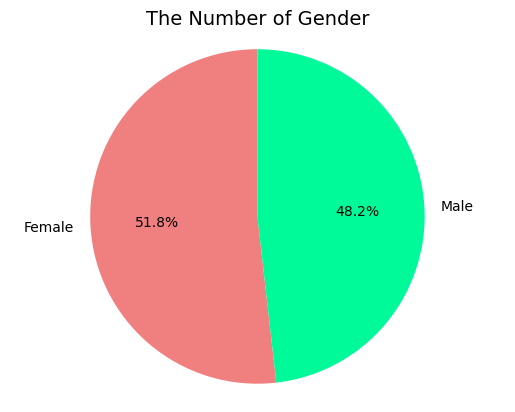

In [176]:
labels = df["Gender"].value_counts().index
sizes = df["Gender"].value_counts()

fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%',
        shadow=False, startangle=90, colors = ["lightcoral", "mediumspringgreen"])
ax1.axis('equal')
plt.title("The Number of Gender", fontsize = 14)
plt.show()

### Looking For The Number of Race/Ethnicity

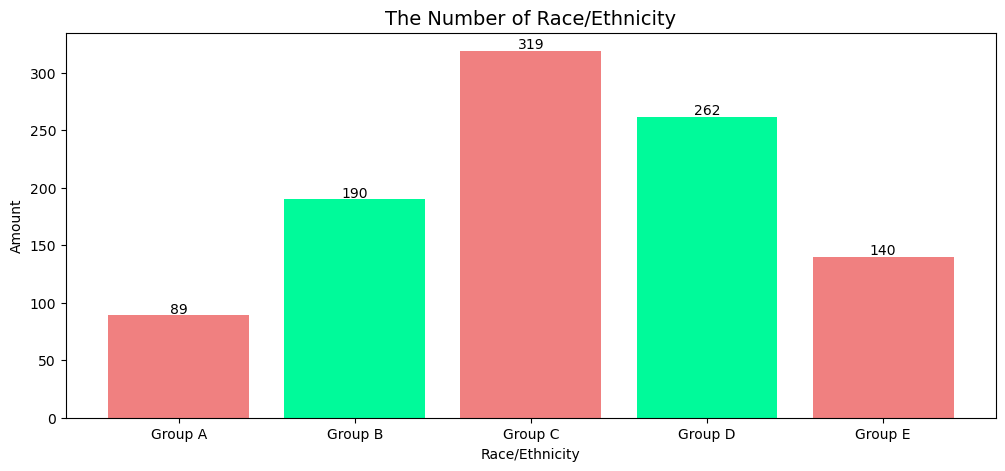

In [177]:
col = df["Race/Ethnicity"]
col = pd.Categorical(col, ["Group A", "Group B", "Group C", "Group D", "Group E"])
colValue = col.value_counts()

plt.figure(figsize = (12, 5))
plt.bar(colValue.index, colValue, color = ["lightcoral", "mediumspringgreen"])
plt.xticks(colValue.index, colValue.index.values)
plt.title("The Number of Race/Ethnicity", fontsize = 14)
plt.ylabel("Amount", fontsize = 10)
plt.xlabel("Race/Ethnicity", fontsize = 10)
plt.text(x = 'Group C', y = 321, s = "319", ha='center',fontsize = 10)
plt.text(x = 'Group D', y = 264, s = "262", ha='center',fontsize = 10)
plt.text(x = 'Group B', y = 192, s = "190", ha='center',fontsize = 10)
plt.text(x = 'Group E', y = 142, s = "140", ha='center',fontsize = 10)
plt.text(x = 'Group A', y = 91, s = "89", ha='center',fontsize = 10)
plt.show()

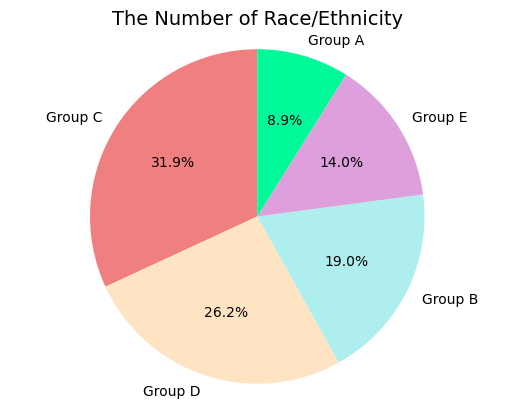

In [178]:
labels = df["Race/Ethnicity"].value_counts().index
sizes = df["Race/Ethnicity"].value_counts()

fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%',
        shadow=False, startangle=90, colors = ["lightcoral", "bisque", "paleturquoise", "plum", "mediumspringgreen", "ivory"])
ax1.axis('equal')
plt.title("The Number of Race/Ethnicity", fontsize = 14)
plt.show()

### Looking For The Number of Parent's Education

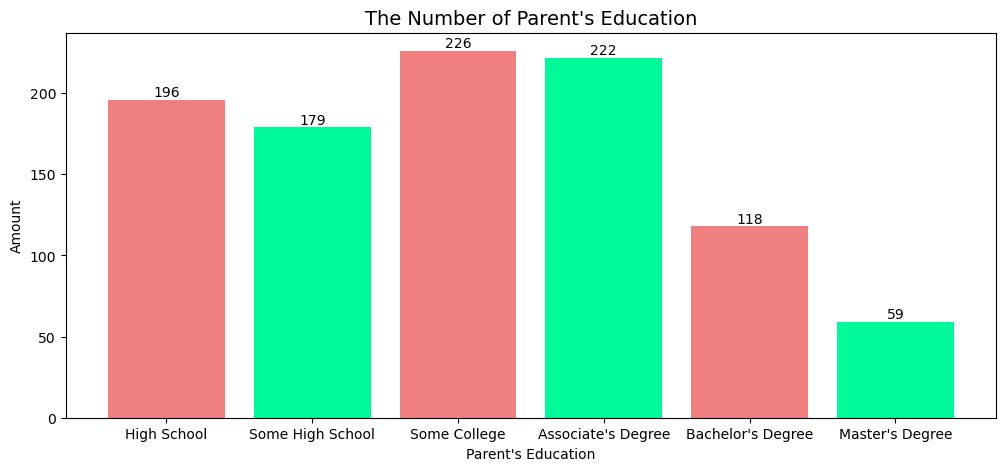

In [179]:
col = df["Parent's Education"]
col = pd.Categorical(col, ["High School", "Some High School", "Some College", "Associate's Degree", "Bachelor's Degree", "Master's Degree"])
colValue = col.value_counts()

plt.figure(figsize = (12, 5))
plt.bar(colValue.index, colValue, color = ["lightcoral", "mediumspringgreen"])
plt.xticks(colValue.index, colValue.index.values)
plt.title("The Number of Parent's Education", fontsize = 14)
plt.ylabel("Amount", fontsize = 10)
plt.xlabel("Parent's Education", fontsize = 10)
plt.text(x = 'Some College', y = 228, s = "226", ha='center',fontsize = 10)
plt.text(x = 'Associate\'s Degree', y = 224, s = "222", ha='center',fontsize = 10)
plt.text(x = 'High School', y = 198, s = "196", ha='center',fontsize = 10)
plt.text(x = 'Some High School', y = 181, s = "179", ha='center',fontsize = 10)
plt.text(x = 'Bachelor\'s Degree', y = 120, s = "118", ha='center',fontsize = 10)
plt.text(x = 'Master\'s Degree', y = 61, s = "59", ha='center',fontsize = 10)
plt.show()

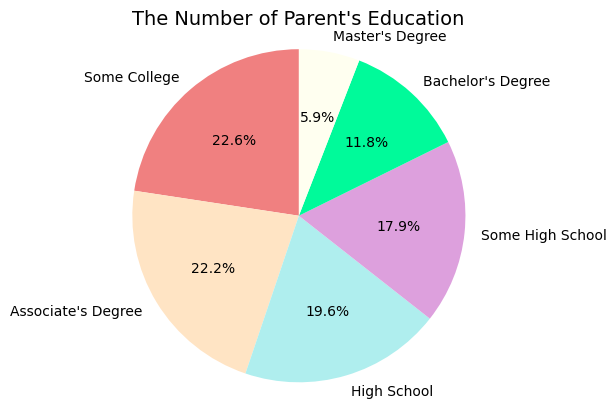

In [180]:
labels = df["Parent's Education"].value_counts().index
sizes = df["Parent's Education"].value_counts()

fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%',
        shadow=False, startangle=90, colors = ["lightcoral", "bisque", "paleturquoise", "plum", "mediumspringgreen", "ivory"])
ax1.axis('equal')
plt.title("The Number of Parent's Education", fontsize = 14)
plt.show()

### Looking For The Number of Lunch

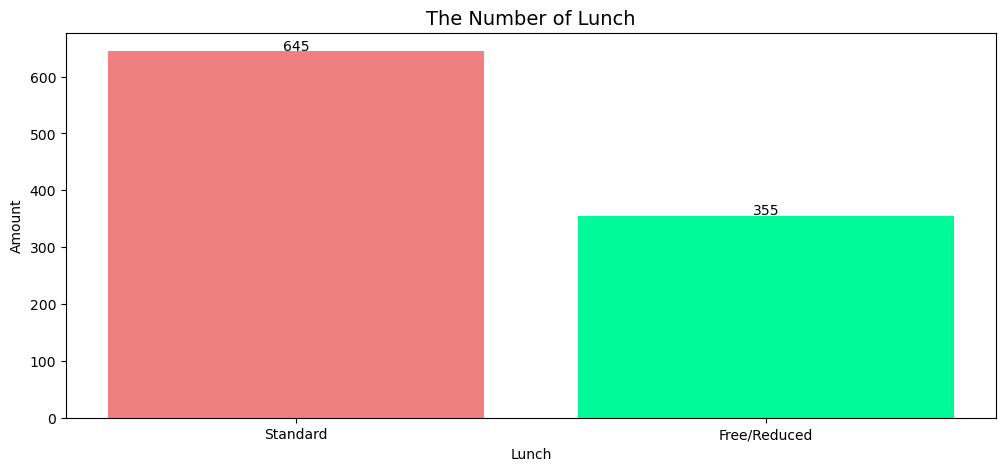

In [181]:
col = df["Lunch"]
col = pd.Categorical(col, ["Standard", "Free/Reduced"])
colValue = col.value_counts()

plt.figure(figsize = (12, 5))
plt.bar(colValue.index, colValue, color = ["lightcoral", "mediumspringgreen"])
plt.xticks(colValue.index, colValue.index.values)
plt.title("The Number of Lunch", fontsize = 14)
plt.ylabel("Amount", fontsize = 10)
plt.xlabel("Lunch", fontsize = 10)
plt.text(x = 'Standard', y = 647, s = "645", ha='center',fontsize = 10)
plt.text(x = 'Free/Reduced', y = 357, s = "355", ha='center',fontsize = 10)
plt.show()

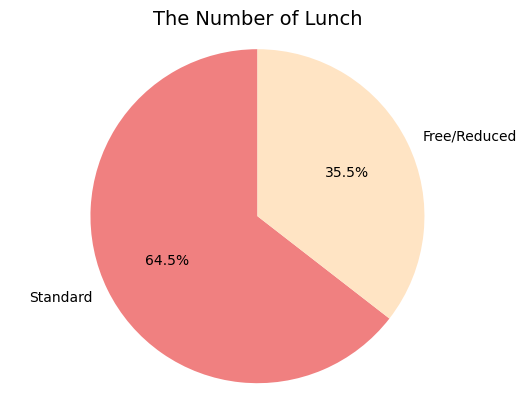

In [182]:
labels = df["Lunch"].value_counts().index
sizes = df["Lunch"].value_counts()

fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%',
        shadow=False, startangle=90, colors = ["lightcoral", "bisque", "paleturquoise", "plum", "mediumspringgreen", "ivory"])
ax1.axis('equal')
plt.title("The Number of Lunch", fontsize = 14)
plt.show()

### Looking For The Number of Test Preparation Course

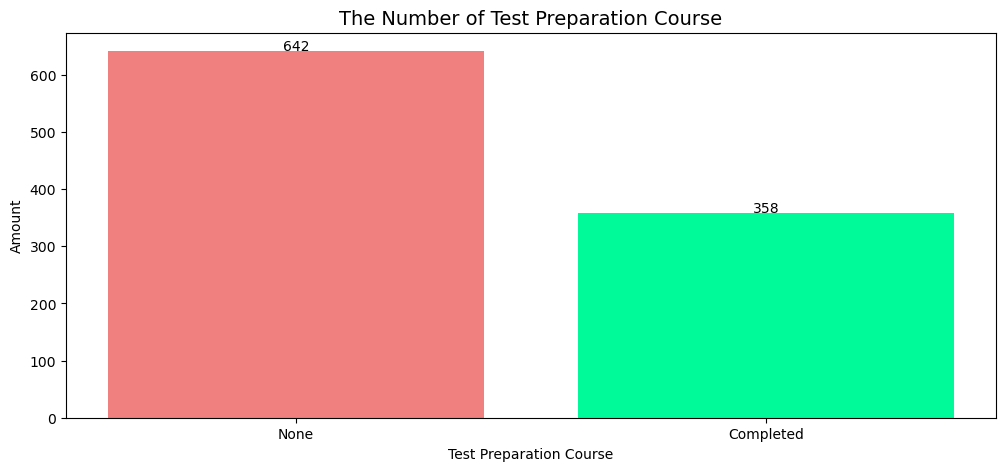

In [183]:
col = df["Test Preparation Course"]
col = pd.Categorical(col, ["None", "Completed"])
colValue = col.value_counts()

plt.figure(figsize = (12, 5))
plt.bar(colValue.index, colValue, color = ["lightcoral", "mediumspringgreen"])
plt.xticks(colValue.index, colValue.index.values)
plt.title("The Number of Test Preparation Course", fontsize = 14)
plt.ylabel("Amount", fontsize = 10)
plt.xlabel("Test Preparation Course", fontsize = 10)
plt.text(x = 'None', y = 644, s = "642", ha='center',fontsize = 10)
plt.text(x = 'Completed', y = 360, s = "358", ha='center',fontsize = 10)
plt.show()

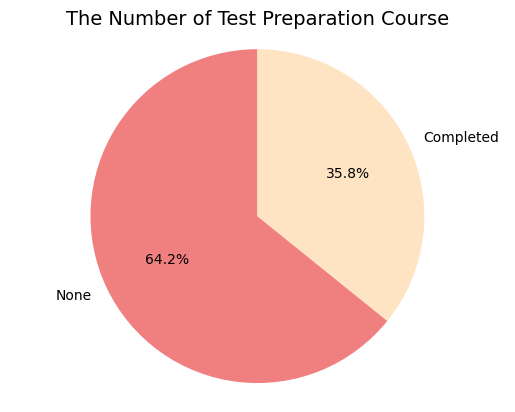

In [184]:
labels = df["Test Preparation Course"].value_counts().index
sizes = df["Test Preparation Course"].value_counts()

fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%',
        shadow=False, startangle=90, colors = ["lightcoral", "bisque", "paleturquoise", "plum", "mediumspringgreen", "ivory"])
ax1.axis('equal')
plt.title("The Number of Test Preparation Course", fontsize = 14)
plt.show()

### Plotting The Math Score Column

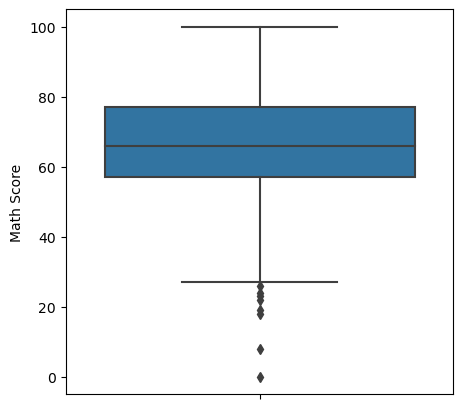

In [185]:
plt.figure(figsize=(5, 5))
sns.boxplot(y = df['Math Score'])
plt.show()

### Plotting The Reading Score Column

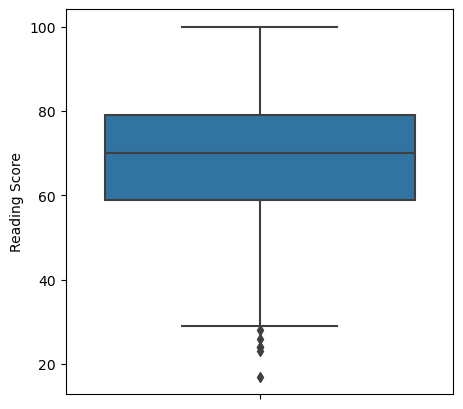

In [186]:
plt.figure(figsize=(5, 5))
sns.boxplot(y = df['Reading Score'])
plt.show()

### Plotting The Writing Score Column

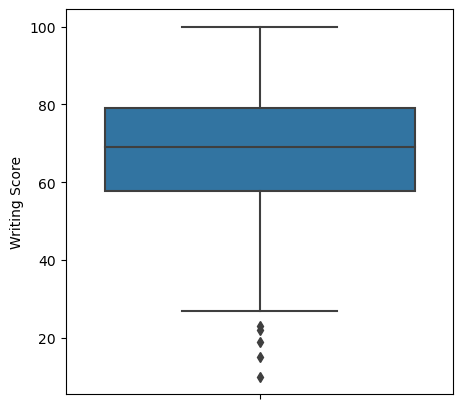

In [187]:
plt.figure(figsize=(5, 5))
sns.boxplot(y = df['Writing Score'])
plt.show()

### Looking For The Number of Math Passed

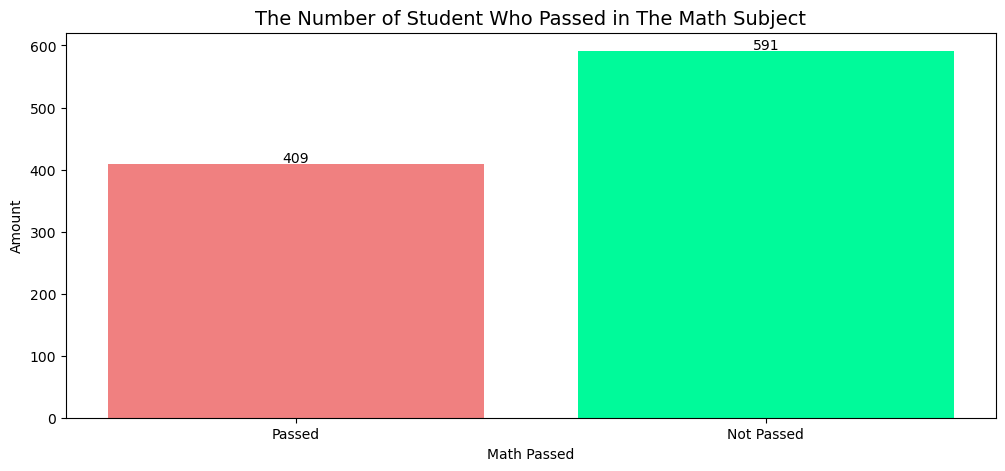

In [188]:
col = df["Math Passed"]
col = pd.Categorical(col, ["Passed", "Not Passed"])
colValue = col.value_counts()

plt.figure(figsize = (12, 5))
plt.bar(colValue.index, colValue, color = ["lightcoral", "mediumspringgreen"])
plt.xticks(colValue.index, colValue.index.values)
plt.title("The Number of Student Who Passed in The Math Subject", fontsize = 14)
plt.ylabel("Amount", fontsize = 10)
plt.xlabel("Math Passed", fontsize = 10)
plt.text(x = 'Not Passed', y = 593, s = "591", ha='center',fontsize = 10)
plt.text(x = 'Passed', y = 411, s = "409", ha='center',fontsize = 10)
plt.show()

### Looking For The Number of Reading Passed

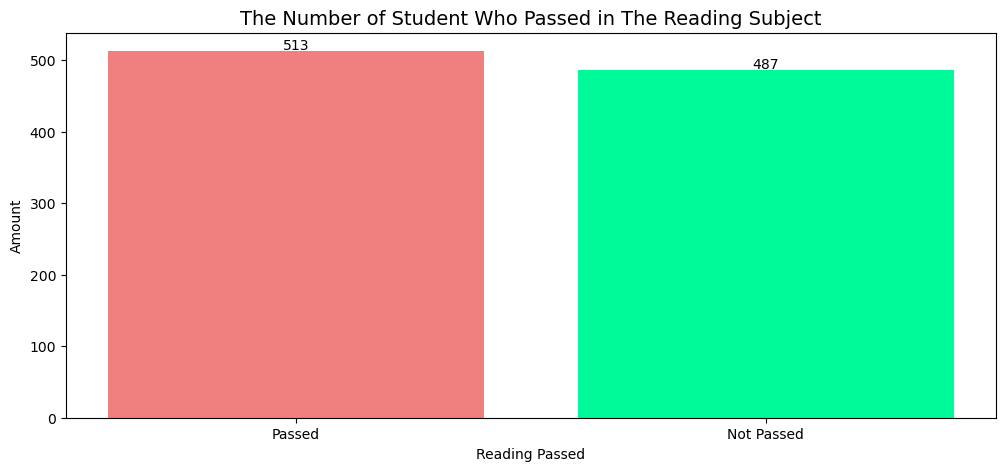

In [189]:
col = df["Reading Passed"]
col = pd.Categorical(col, ["Passed", "Not Passed"])
colValue = col.value_counts()

plt.figure(figsize = (12, 5))
plt.bar(colValue.index, colValue, color = ["lightcoral", "mediumspringgreen"])
plt.xticks(colValue.index, colValue.index.values)
plt.title("The Number of Student Who Passed in The Reading Subject", fontsize = 14)
plt.ylabel("Amount", fontsize = 10)
plt.xlabel("Reading Passed", fontsize = 10)
plt.text(x = 'Not Passed', y = 489, s = "487", ha='center',fontsize = 10)
plt.text(x = 'Passed', y = 515, s = "513", ha='center',fontsize = 10)
plt.show()

### Looking For The Number of Writing Passed

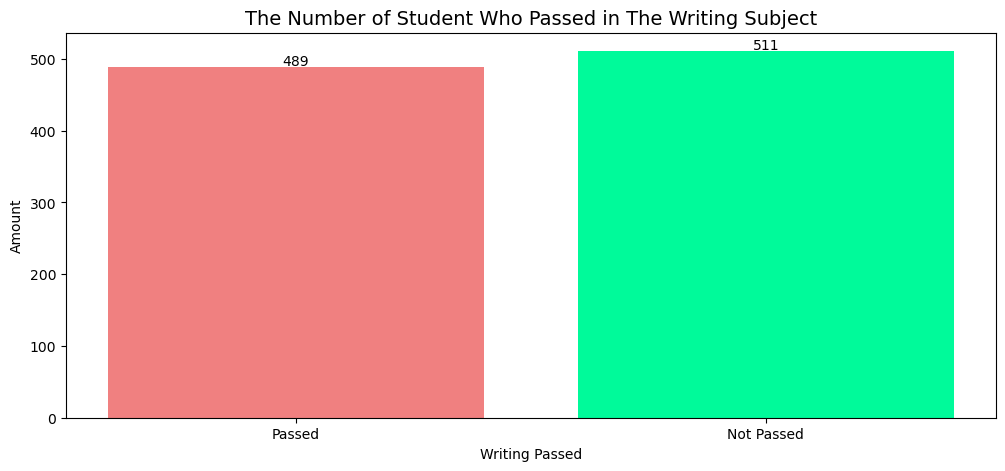

In [190]:
col = df["Writing Passed"]
col = pd.Categorical(col, ["Passed", "Not Passed"])
colValue = col.value_counts()

plt.figure(figsize = (12, 5))
plt.bar(colValue.index, colValue, color = ["lightcoral", "mediumspringgreen"])
plt.xticks(colValue.index, colValue.index.values)
plt.title("The Number of Student Who Passed in The Writing Subject", fontsize = 14)
plt.ylabel("Amount", fontsize = 10)
plt.xlabel("Writing Passed", fontsize = 10)
plt.text(x = 'Not Passed', y = 513, s = "511", ha='center',fontsize = 10)
plt.text(x = 'Passed', y = 491, s = "489", ha='center',fontsize = 10)
plt.show()

### Looking For The Number of All Subject Passed

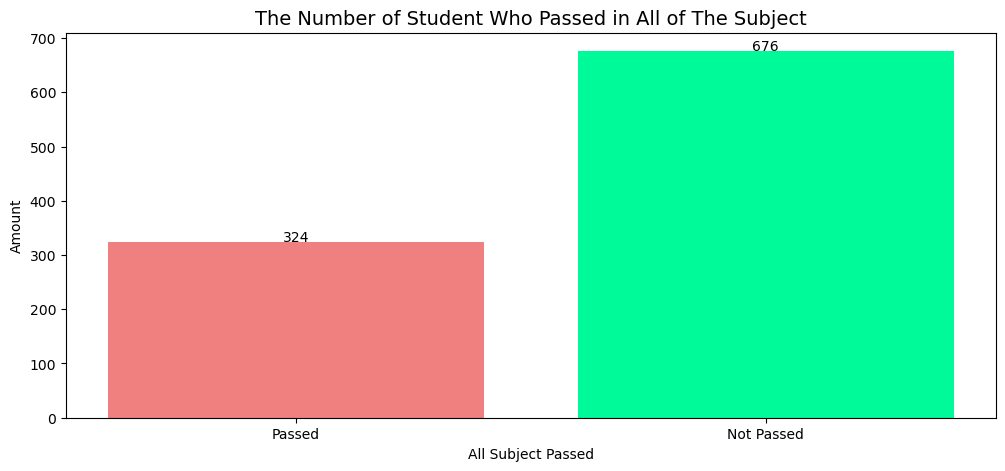

In [191]:
col = df["All Subject Passed"]
col = pd.Categorical(col, ["Passed", "Not Passed"])
colValue = col.value_counts()

plt.figure(figsize = (12, 5))
plt.bar(colValue.index, colValue, color = ["lightcoral", "mediumspringgreen"])
plt.xticks(colValue.index, colValue.index.values)
plt.title("The Number of Student Who Passed in All of The Subject", fontsize = 14)
plt.ylabel("Amount", fontsize = 10)
plt.xlabel("All Subject Passed", fontsize = 10)
plt.text(x = 'Not Passed', y = 678, s = "676", ha='center',fontsize = 10)
plt.text(x = 'Passed', y = 326, s = "324", ha='center',fontsize = 10)
plt.show()

### Looking For The Number of Gender Who Passed The Mathematic Subject

In [192]:
def Amount(Column, Subject):
    Amount = pd.DataFrame({'Amount' : df.groupby([Column, Subject]).size()}).sort_values(by= Subject, ascending=False).reset_index()
    return Amount

In [193]:
gender_math_passed = Amount("Gender", "Math Passed")
gender_math_passed

,Gender,Math Passed,Amount
0,Female,Passed,178
1,Male,Passed,231
2,Female,Not Passed,340
3,Male,Not Passed,251


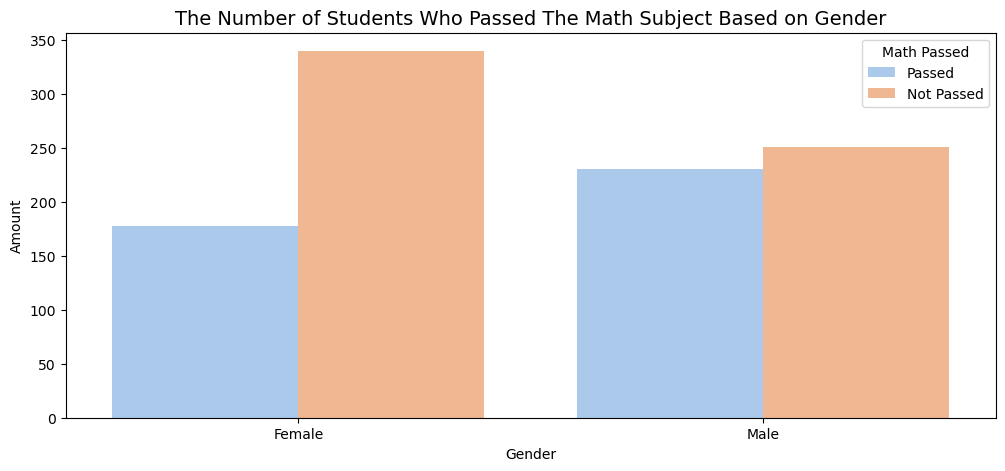

In [194]:
plt.figure(figsize = (12, 5))
sns.countplot(data = df, x = df["Gender"], hue = df["Math Passed"], palette = "pastel")
plt.title("The Number of Students Who Passed The Math Subject Based on Gender", fontsize = 14)
plt.ylabel("Amount", fontsize = 10)
plt.xlabel("Gender", fontsize = 10)
plt.show()

### Looking For The Number of Gender Who Passed The Reading Subject

In [195]:
gender_reading_passed = Amount("Gender", "Reading Passed")
gender_reading_passed

,Gender,Reading Passed,Amount
0,Female,Passed,318
1,Male,Passed,195
2,Female,Not Passed,200
3,Male,Not Passed,287


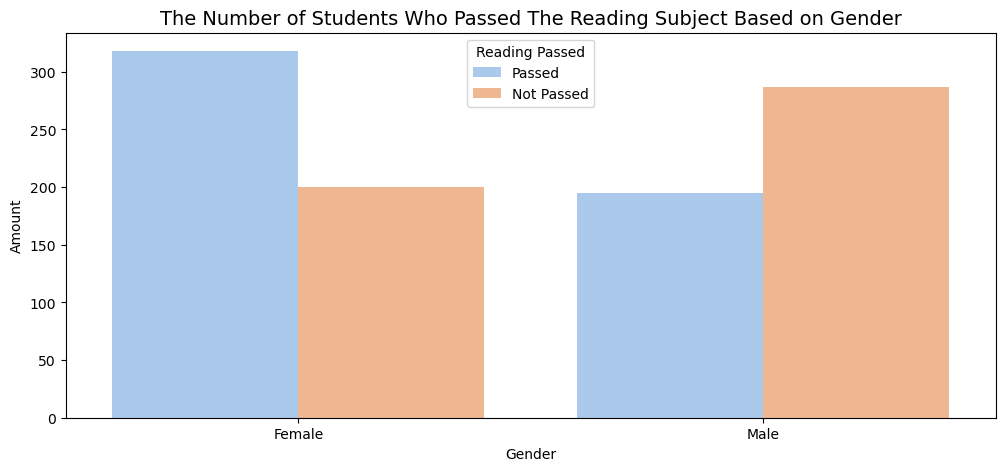

In [196]:
plt.figure(figsize = (12, 5))
sns.countplot(data = df, x = df["Gender"], hue = df["Reading Passed"], palette = "pastel")
plt.title("The Number of Students Who Passed The Reading Subject Based on Gender", fontsize = 14)
plt.ylabel("Amount", fontsize = 10)
plt.xlabel("Gender", fontsize = 10)
plt.show()

### Looking For The Number of Gender Who Passed The Writing Subject

In [197]:
writing_math_passed = Amount("Gender", "Writing Passed")
writing_math_passed

,Gender,Writing Passed,Amount
0,Female,Passed,325
1,Male,Passed,164
2,Female,Not Passed,193
3,Male,Not Passed,318


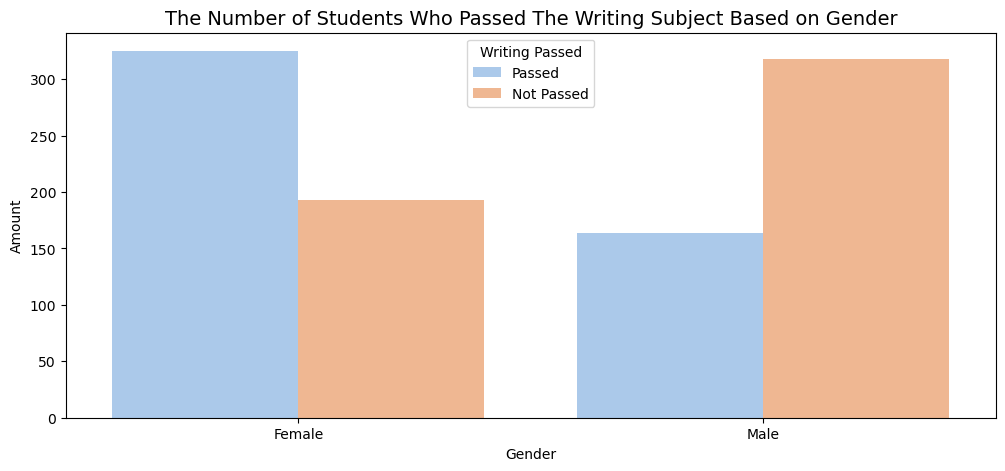

In [198]:
plt.figure(figsize = (12, 5))
sns.countplot(data = df, x = df["Gender"], hue = df["Writing Passed"], palette = "pastel")
plt.title("The Number of Students Who Passed The Writing Subject Based on Gender", fontsize = 14)
plt.ylabel("Amount", fontsize = 10)
plt.xlabel("Gender", fontsize = 10)
plt.show()

### Looking For The Number of Gender Who Passed All of The Subject

In [199]:
gender_all_passed = Amount("Gender", "All Subject Passed")
gender_all_passed

,Gender,All Subject Passed,Amount
0,Female,Passed,176
1,Male,Passed,148
2,Female,Not Passed,342
3,Male,Not Passed,334


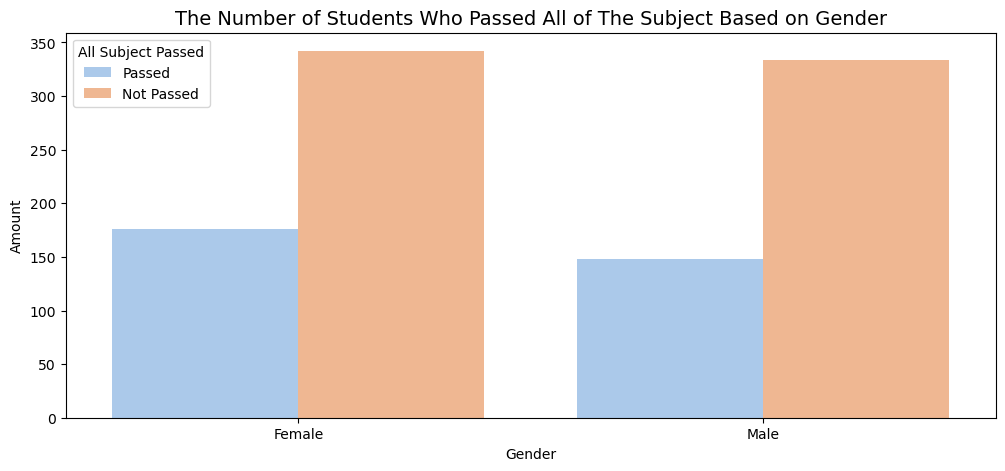

In [200]:
plt.figure(figsize = (12, 5))
sns.countplot(data = df, x = df["Gender"], hue = df["All Subject Passed"], palette = "pastel")
plt.title("The Number of Students Who Passed All of The Subject Based on Gender", fontsize = 14)
plt.ylabel("Amount", fontsize = 10)
plt.xlabel("Gender", fontsize = 10)
plt.show()

### Looking For The Number of Race/Ethnicity Who Passed The Mathematic Subject

In [201]:
race_math_passed = Amount("Race/Ethnicity", "Math Passed")
race_math_passed

,Race/Ethnicity,Math Passed,Amount
0,Group A,Passed,25
1,Group B,Passed,65
2,Group C,Passed,111
3,Group D,Passed,118
4,Group E,Passed,90
5,Group A,Not Passed,64
6,Group B,Not Passed,125
7,Group C,Not Passed,208
8,Group D,Not Passed,144
9,Group E,Not Passed,50


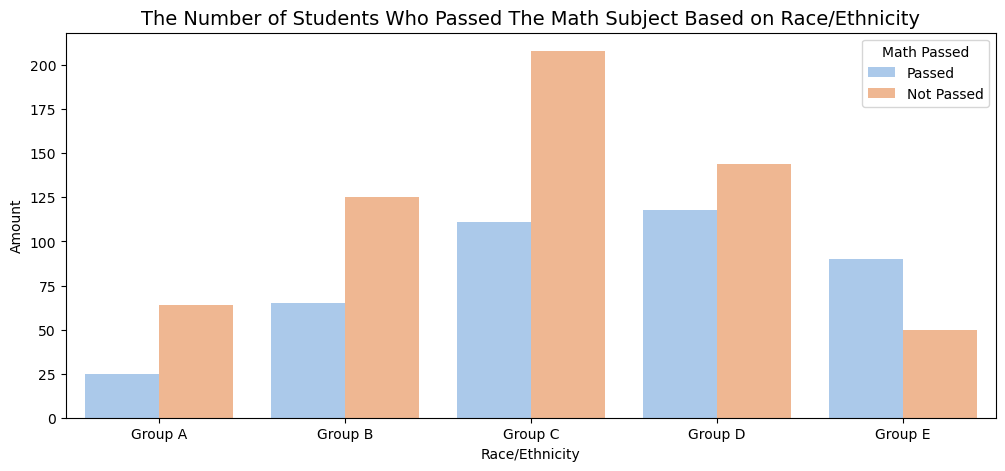

In [202]:
col = pd.Categorical(df["Race/Ethnicity"], ["Group A", "Group B", "Group C", "Group D", "Group E"])
plt.figure(figsize = (12, 5))
sns.countplot(data = df, x = col, hue = df["Math Passed"], palette = "pastel")
plt.title("The Number of Students Who Passed The Math Subject Based on Race/Ethnicity", fontsize = 14)
plt.ylabel("Amount", fontsize = 10)
plt.xlabel("Race/Ethnicity", fontsize = 10)
plt.show()

### Looking For The Number of Race/Ethnicity Who Passed The Reading Subject

In [203]:
race_reading_passed = Amount("Race/Ethnicity", "Reading Passed")
race_reading_passed

,Race/Ethnicity,Reading Passed,Amount
0,Group A,Passed,33
1,Group B,Passed,85
2,Group C,Passed,163
3,Group D,Passed,143
4,Group E,Passed,89
5,Group A,Not Passed,56
6,Group B,Not Passed,105
7,Group C,Not Passed,156
8,Group D,Not Passed,119
9,Group E,Not Passed,51


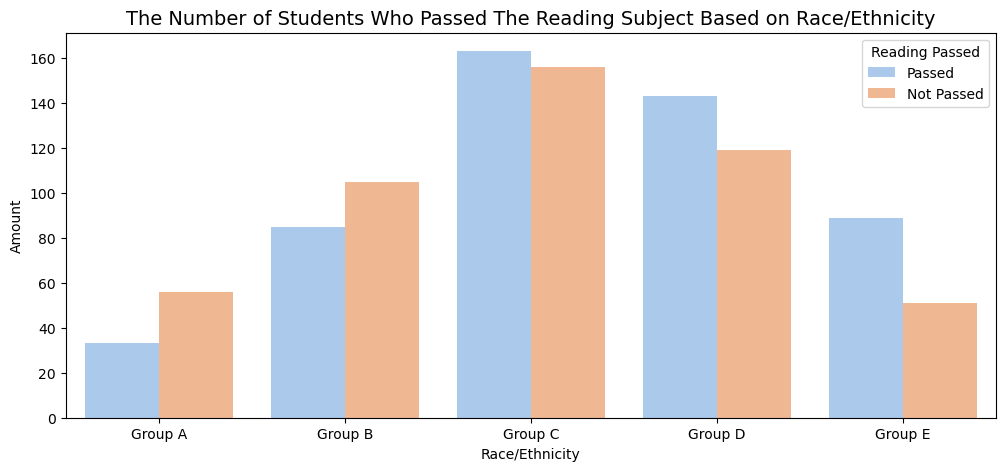

In [204]:
col = pd.Categorical(df["Race/Ethnicity"], ["Group A", "Group B", "Group C", "Group D", "Group E"])
plt.figure(figsize = (12, 5))
sns.countplot(data = df, x = col, hue = df["Reading Passed"], palette = "pastel")
plt.title("The Number of Students Who Passed The Reading Subject Based on Race/Ethnicity", fontsize = 14)
plt.ylabel("Amount", fontsize = 10)
plt.xlabel("Race/Ethnicity", fontsize = 10)
plt.show()

### Looking For The Number of Race/Ethnicity Who Passed The Writing Subject

In [205]:
race_math_passed = Amount("Race/Ethnicity", "Writing Passed")
race_math_passed

,Race/Ethnicity,Writing Passed,Amount
0,Group A,Passed,28
1,Group B,Passed,81
2,Group C,Passed,152
3,Group D,Passed,143
4,Group E,Passed,85
5,Group A,Not Passed,61
6,Group B,Not Passed,109
7,Group C,Not Passed,167
8,Group D,Not Passed,119
9,Group E,Not Passed,55


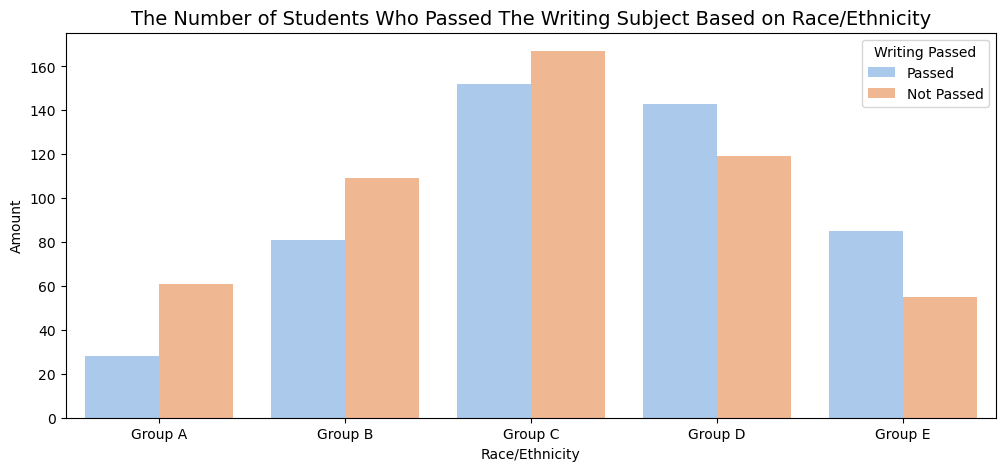

In [206]:
col = pd.Categorical(df["Race/Ethnicity"], ["Group A", "Group B", "Group C", "Group D", "Group E"])
plt.figure(figsize = (12, 5))
sns.countplot(data = df, x = col, hue = df["Writing Passed"], palette = "pastel")
plt.title("The Number of Students Who Passed The Writing Subject Based on Race/Ethnicity", fontsize = 14)
plt.ylabel("Amount", fontsize = 10)
plt.xlabel("Race/Ethnicity", fontsize = 10)
plt.show()

### Looking For The Number of Race/Ethnicity Who Passed All of The Subject

In [207]:
race_all_passed = Amount("Race/Ethnicity", "All Subject Passed")
race_all_passed

,Race/Ethnicity,All Subject Passed,Amount
0,Group A,Passed,20
1,Group B,Passed,52
2,Group C,Passed,88
3,Group D,Passed,93
4,Group E,Passed,71
5,Group A,Not Passed,69
6,Group B,Not Passed,138
7,Group C,Not Passed,231
8,Group D,Not Passed,169
9,Group E,Not Passed,69


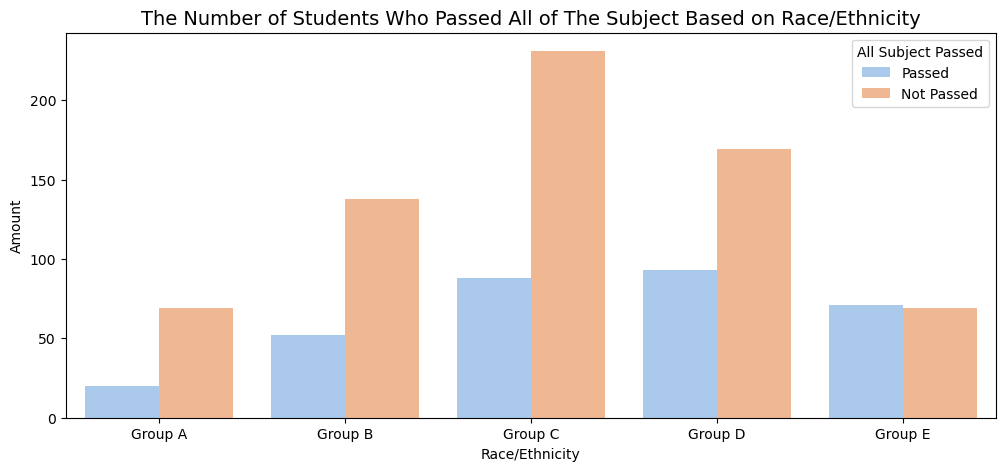

In [208]:
col = pd.Categorical(df["Race/Ethnicity"], ["Group A", "Group B", "Group C", "Group D", "Group E"])
plt.figure(figsize = (12, 5))
sns.countplot(data = df, x = col, hue = df["All Subject Passed"], palette = "pastel")
plt.title("The Number of Students Who Passed All of The Subject Based on Race/Ethnicity", fontsize = 14)
plt.ylabel("Amount", fontsize = 10)
plt.xlabel("Race/Ethnicity", fontsize = 10)
plt.show()

### Looking For The Number of Parent's Education Who Passed The Mathematic Subject

In [209]:
parent_math_passed = Amount("Parent's Education", "Math Passed")
parent_math_passed

,Parent's Education,Math Passed,Amount
0,Associate's Degree,Passed,98
1,Bachelor's Degree,Passed,56
2,High School,Passed,63
3,Master's Degree,Passed,33
4,Some College,Passed,93
5,Some High School,Passed,66
6,Associate's Degree,Not Passed,124
7,Bachelor's Degree,Not Passed,62
8,High School,Not Passed,133
9,Master's Degree,Not Passed,26


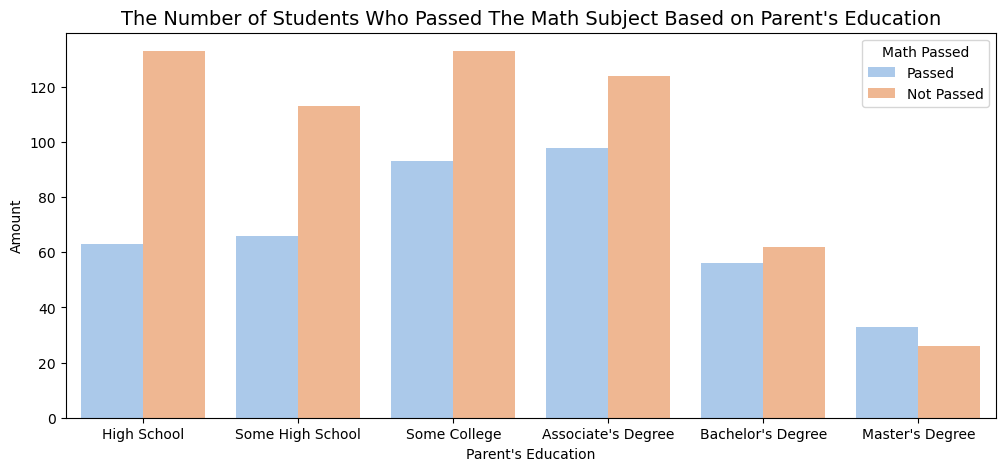

In [210]:
col = pd.Categorical(df["Parent's Education"], ["High School", "Some High School", "Some College", "Associate's Degree", "Bachelor's Degree", "Master's Degree"])
plt.figure(figsize = (12, 5))
sns.countplot(data = df, x = col, hue = df["Math Passed"], palette = "pastel")
plt.title("The Number of Students Who Passed The Math Subject Based on Parent's Education", fontsize = 14)
plt.ylabel("Amount", fontsize = 10)
plt.xlabel("Parent's Education", fontsize = 10)
plt.show()

### Looking For The Number of Parent's Education Who Passed The Reading Subject

In [211]:
parent_reading_passed = Amount("Parent's Education", "Reading Passed")
parent_reading_passed

,Parent's Education,Reading Passed,Amount
0,Associate's Degree,Passed,126
1,Bachelor's Degree,Passed,72
2,High School,Passed,79
3,Master's Degree,Passed,38
4,Some College,Passed,118
5,Some High School,Passed,80
6,Associate's Degree,Not Passed,96
7,Bachelor's Degree,Not Passed,46
8,High School,Not Passed,117
9,Master's Degree,Not Passed,21


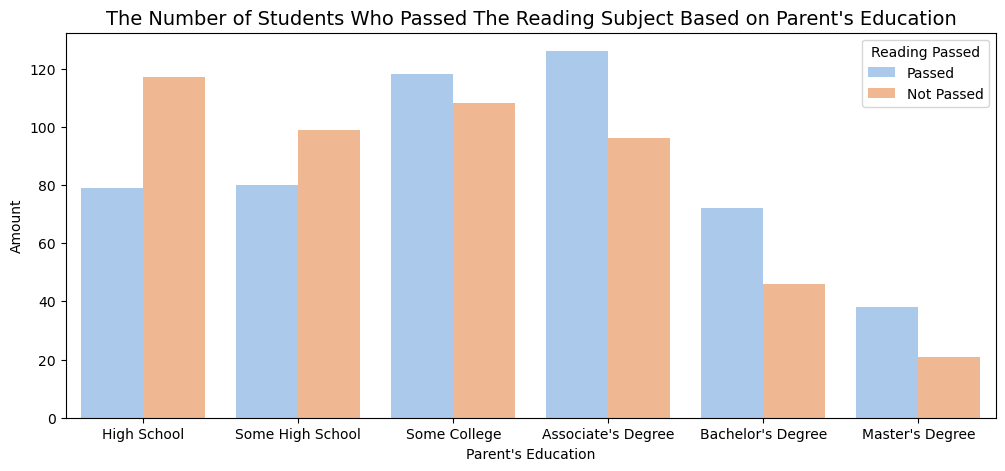

In [212]:
col = pd.Categorical(df["Parent's Education"], ["High School", "Some High School", "Some College", "Associate's Degree", "Bachelor's Degree", "Master's Degree"])
plt.figure(figsize = (12, 5))
sns.countplot(data = df, x = col, hue = df["Reading Passed"], palette = "pastel")
plt.title("The Number of Students Who Passed The Reading Subject Based on Parent's Education", fontsize = 14)
plt.ylabel("Amount", fontsize = 10)
plt.xlabel("Parent's Education", fontsize = 10)
plt.show()

### Looking For The Number of Parent's Education Who Passed The Writing Subject

In [213]:
parent_math_passed = Amount("Parent's Education", "Writing Passed")
parent_math_passed

,Parent's Education,Writing Passed,Amount
0,Associate's Degree,Passed,118
1,Bachelor's Degree,Passed,74
2,High School,Passed,65
3,Master's Degree,Passed,39
4,Some College,Passed,118
5,Some High School,Passed,75
6,Associate's Degree,Not Passed,104
7,Bachelor's Degree,Not Passed,44
8,High School,Not Passed,131
9,Master's Degree,Not Passed,20


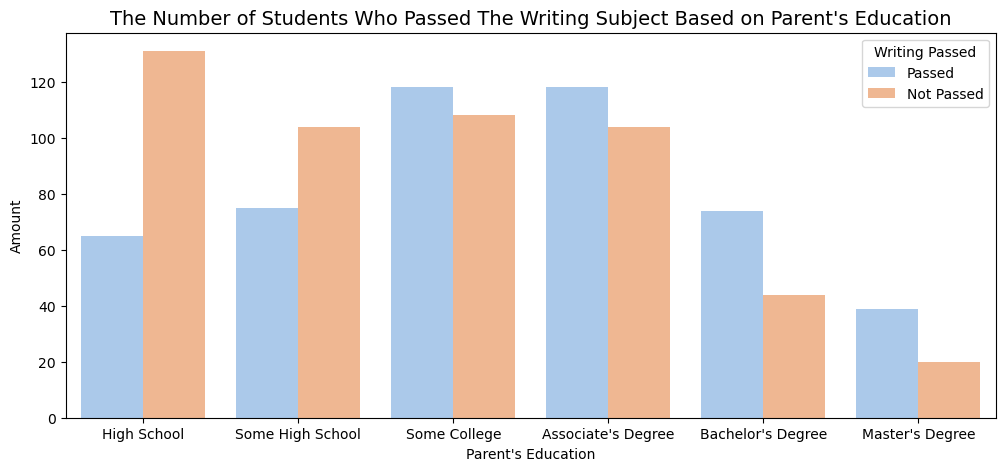

In [214]:
col = pd.Categorical(df["Parent's Education"], ["High School", "Some High School", "Some College", "Associate's Degree", "Bachelor's Degree", "Master's Degree"])
plt.figure(figsize = (12, 5))
sns.countplot(data = df, x = col, hue = df["Writing Passed"], palette = "pastel")
plt.title("The Number of Students Who Passed The Writing Subject Based on Parent's Education", fontsize = 14)
plt.ylabel("Amount", fontsize = 10)
plt.xlabel("Parent's Education", fontsize = 10)
plt.show()

### Looking For The Number of Parent's Education Who Passed All of The Subject

In [215]:
parent_all_passed = Amount("Parent's Education", "All Subject Passed")
parent_all_passed

,Parent's Education,All Subject Passed,Amount
0,Associate's Degree,Passed,82
1,Bachelor's Degree,Passed,47
2,High School,Passed,38
3,Master's Degree,Passed,30
4,Some College,Passed,78
5,Some High School,Passed,49
6,Associate's Degree,Not Passed,140
7,Bachelor's Degree,Not Passed,71
8,High School,Not Passed,158
9,Master's Degree,Not Passed,29


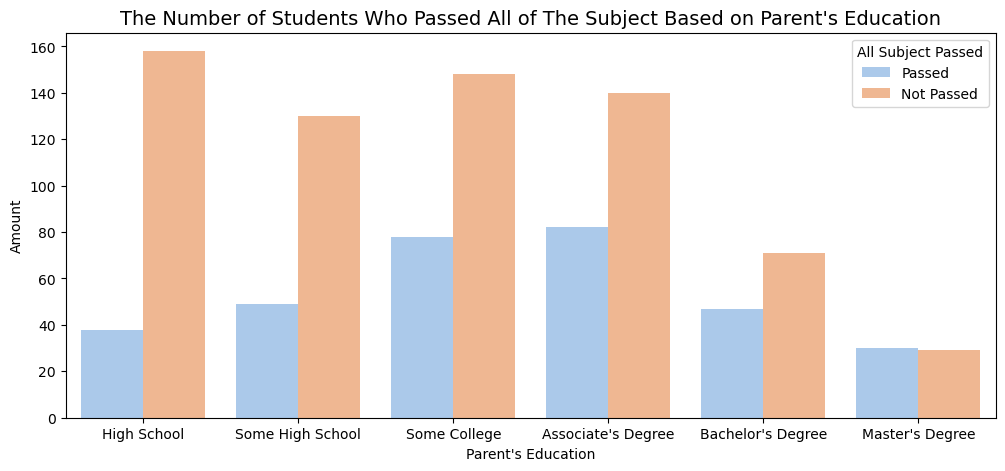

In [216]:
col = pd.Categorical(df["Parent's Education"], ["High School", "Some High School", "Some College", "Associate's Degree", "Bachelor's Degree", "Master's Degree"])
plt.figure(figsize = (12, 5))
sns.countplot(data = df, x = col, hue = df["All Subject Passed"], palette = "pastel")
plt.title("The Number of Students Who Passed All of The Subject Based on Parent's Education", fontsize = 14)
plt.ylabel("Amount", fontsize = 10)
plt.xlabel("Parent's Education", fontsize = 10)
plt.show()

### Looking For The Number of Lunch Who Passed The Mathematic Subject

In [217]:
Lunch_math_passed = Amount("Lunch", "Math Passed")
Lunch_math_passed

,Lunch,Math Passed,Amount
0,Free/Reduced,Passed,87
1,Standard,Passed,322
2,Free/Reduced,Not Passed,268
3,Standard,Not Passed,323


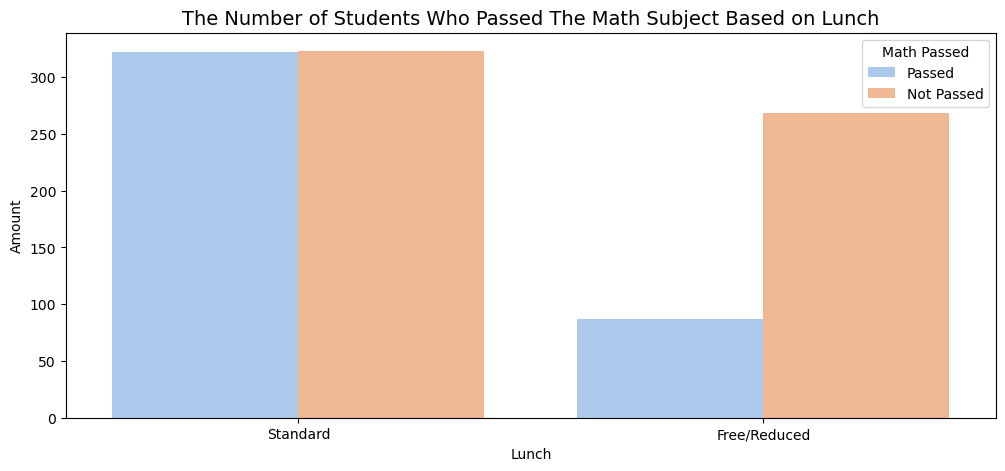

In [218]:
col = pd.Categorical(df["Lunch"], ["Standard", "Free/Reduced"])
plt.figure(figsize = (12, 5))
sns.countplot(data = df, x = col, hue = df["Math Passed"], palette = "pastel")
plt.title("The Number of Students Who Passed The Math Subject Based on Lunch", fontsize = 14)
plt.ylabel("Amount", fontsize = 10)
plt.xlabel("Lunch", fontsize = 10)
plt.show()

### Looking For The Number of Lunch Who Passed The Reading Subject

In [219]:
Lunch_reading_passed = Amount("Lunch", "Reading Passed")
Lunch_reading_passed

,Lunch,Reading Passed,Amount
0,Free/Reduced,Passed,137
1,Standard,Passed,376
2,Free/Reduced,Not Passed,218
3,Standard,Not Passed,269


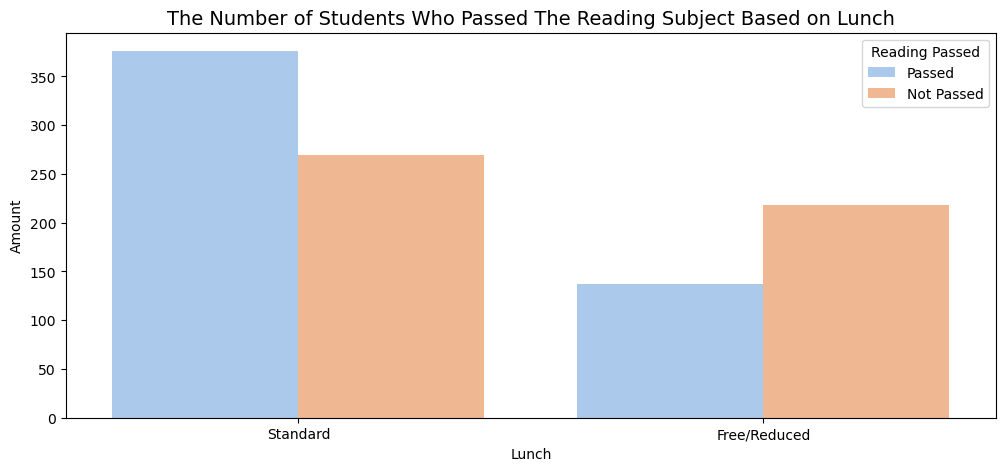

In [220]:
col = pd.Categorical(df["Lunch"], ["Standard", "Free/Reduced"])
plt.figure(figsize = (12, 5))
sns.countplot(data = df, x = col, hue = df["Reading Passed"], palette = "pastel")
plt.title("The Number of Students Who Passed The Reading Subject Based on Lunch", fontsize = 14)
plt.ylabel("Amount", fontsize = 10)
plt.xlabel("Lunch", fontsize = 10)
plt.show()

### Looking For The Number of Lunch Who Passed The Writing Subject

In [221]:
Lunch_math_passed = Amount("Lunch", "Writing Passed")
Lunch_math_passed

,Lunch,Writing Passed,Amount
0,Free/Reduced,Passed,128
1,Standard,Passed,361
2,Free/Reduced,Not Passed,227
3,Standard,Not Passed,284


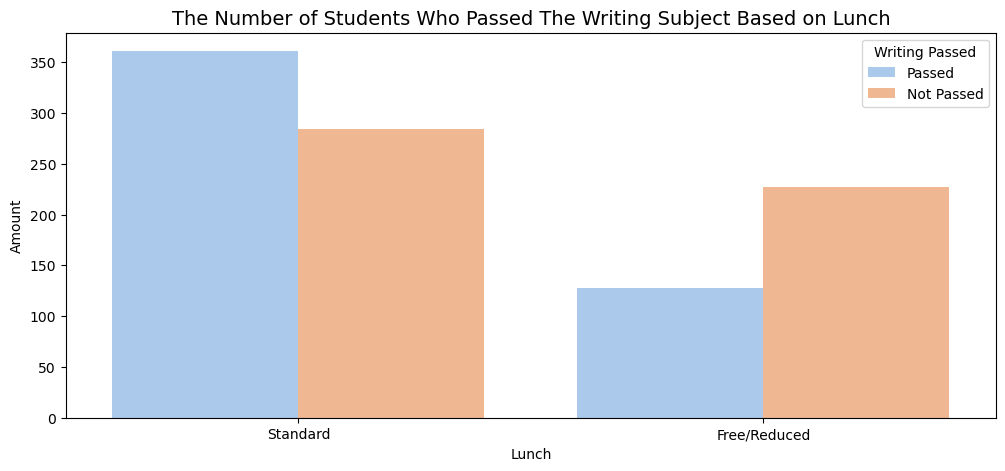

In [222]:
col = pd.Categorical(df["Lunch"], ["Standard", "Free/Reduced"])
plt.figure(figsize = (12, 5))
sns.countplot(data = df, x = col, hue = df["Writing Passed"], palette = "pastel")
plt.title("The Number of Students Who Passed The Writing Subject Based on Lunch", fontsize = 14)
plt.ylabel("Amount", fontsize = 10)
plt.xlabel("Lunch", fontsize = 10)
plt.show()

### Looking For The Number of Lunch Who Passed All of The Subject

In [223]:
Lunch_all_passed = Amount("Lunch", "All Subject Passed")
Lunch_all_passed

,Lunch,All Subject Passed,Amount
0,Free/Reduced,Passed,70
1,Standard,Passed,254
2,Free/Reduced,Not Passed,285
3,Standard,Not Passed,391


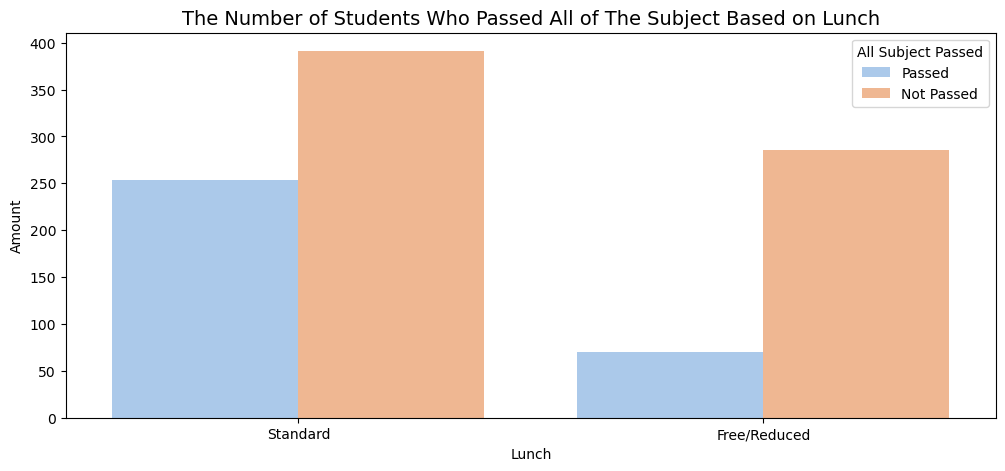

In [224]:
col = pd.Categorical(df["Lunch"], ["Standard", "Free/Reduced"])
plt.figure(figsize = (12, 5))
sns.countplot(data = df, x = col, hue = df["All Subject Passed"], palette = "pastel")
plt.title("The Number of Students Who Passed All of The Subject Based on Lunch", fontsize = 14)
plt.ylabel("Amount", fontsize = 10)
plt.xlabel("Lunch", fontsize = 10)
plt.show()

### Looking For The Number of Test Preparation Course Who Passed The Mathematic Subject

In [225]:
Preparation_math_passed = Amount("Test Preparation Course", "Math Passed")
Preparation_math_passed

,Test Preparation Course,Math Passed,Amount
0,Completed,Passed,176
1,None,Passed,233
2,Completed,Not Passed,182
3,None,Not Passed,409


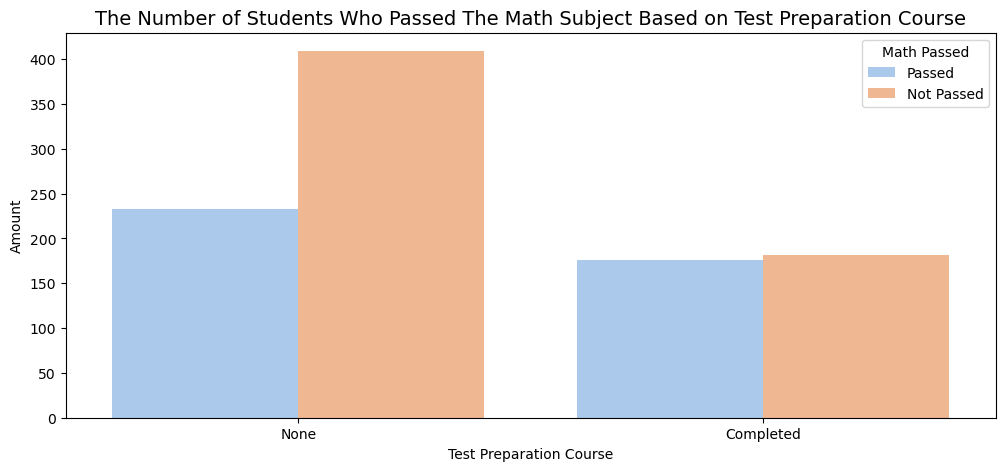

In [226]:
col = pd.Categorical(df["Test Preparation Course"], ["None", "Completed"])
plt.figure(figsize = (12, 5))
sns.countplot(data = df, x = col, hue = df["Math Passed"], palette = "pastel")
plt.title("The Number of Students Who Passed The Math Subject Based on Test Preparation Course", fontsize = 14)
plt.ylabel("Amount", fontsize = 10)
plt.xlabel("Test Preparation Course", fontsize = 10)
plt.show()

### Looking For The Number of Test Preparation Course Who Passed The Reading Subject

In [227]:
Preparation_reading_passed = Amount("Test Preparation Course", "Reading Passed")
Preparation_reading_passed

,Test Preparation Course,Reading Passed,Amount
0,Completed,Passed,234
1,None,Passed,279
2,Completed,Not Passed,124
3,None,Not Passed,363


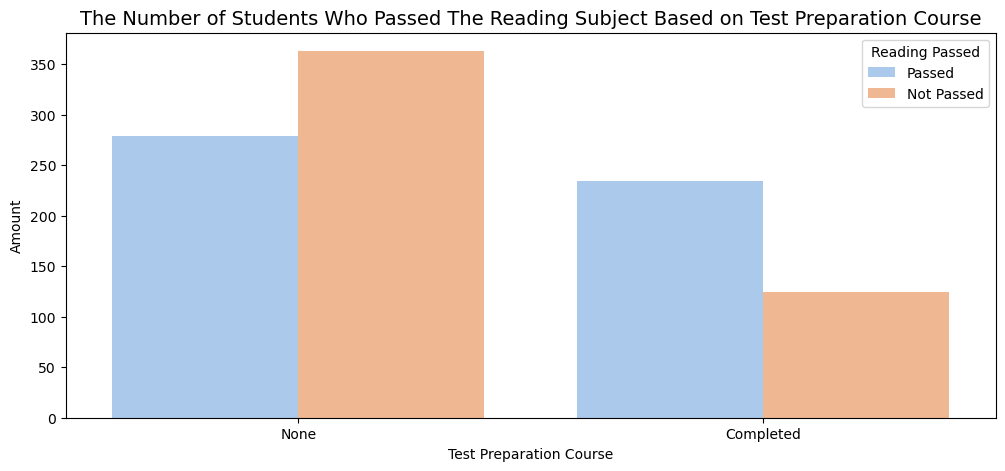

In [228]:
col = pd.Categorical(df["Test Preparation Course"], ["None", "Completed"])
plt.figure(figsize = (12, 5))
sns.countplot(data = df, x = col, hue = df["Reading Passed"], palette = "pastel")
plt.title("The Number of Students Who Passed The Reading Subject Based on Test Preparation Course", fontsize = 14)
plt.ylabel("Amount", fontsize = 10)
plt.xlabel("Test Preparation Course", fontsize = 10)
plt.show()

### Looking For The Number of Test Preparation Course Who Passed The Writing Subject

In [229]:
Preparation_math_passed = Amount("Test Preparation Course", "Writing Passed")
Preparation_math_passed

,Test Preparation Course,Writing Passed,Amount
0,Completed,Passed,238
1,None,Passed,251
2,Completed,Not Passed,120
3,None,Not Passed,391


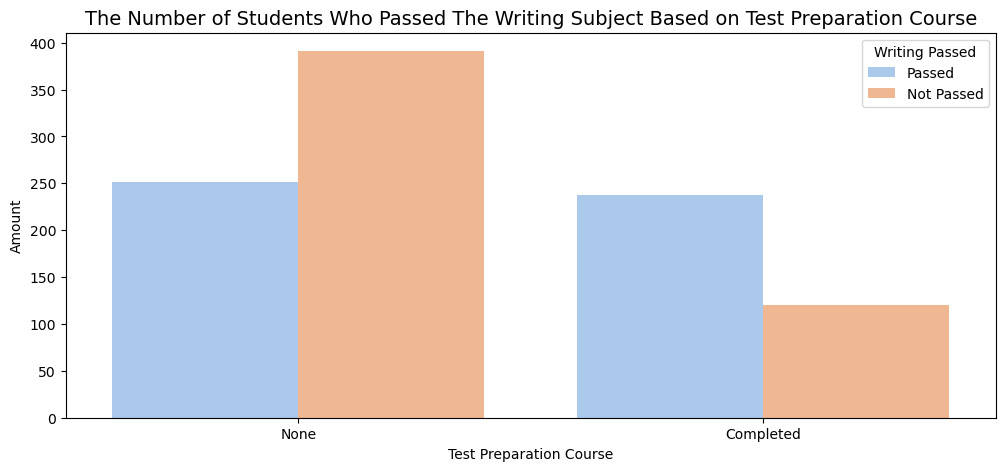

In [230]:
col = pd.Categorical(df["Test Preparation Course"], ["None", "Completed"])
plt.figure(figsize = (12, 5))
sns.countplot(data = df, x = col, hue = df["Writing Passed"], palette = "pastel")
plt.title("The Number of Students Who Passed The Writing Subject Based on Test Preparation Course", fontsize = 14)
plt.ylabel("Amount", fontsize = 10)
plt.xlabel("Test Preparation Course", fontsize = 10)
plt.show()

### Looking For The Number of Test Preparation Course Who Passed All of The Subject

In [231]:
Preparation_all_passed = Amount("Test Preparation Course", "All Subject Passed")
Preparation_all_passed

,Test Preparation Course,All Subject Passed,Amount
0,Completed,Passed,150
1,None,Passed,174
2,Completed,Not Passed,208
3,None,Not Passed,468


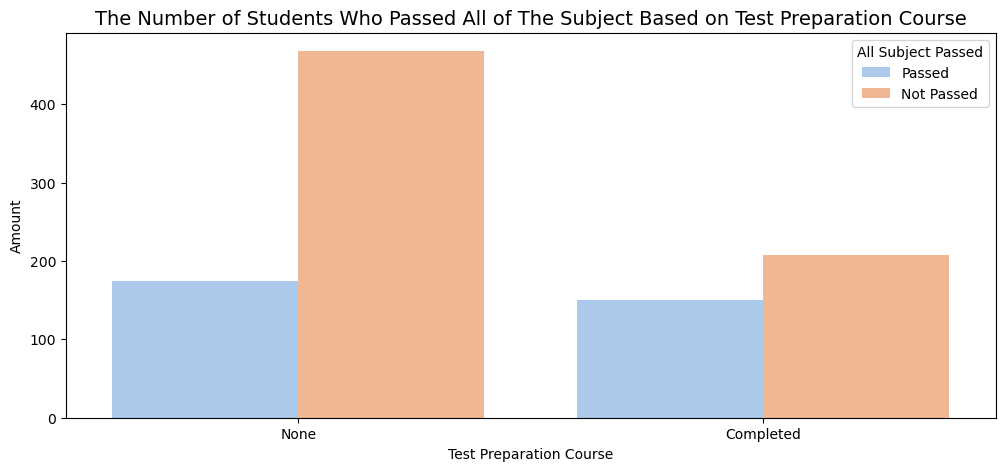

In [232]:
col = pd.Categorical(df["Test Preparation Course"], ["None", "Completed"])
plt.figure(figsize = (12, 5))
sns.countplot(data = df, x = col, hue = df["All Subject Passed"], palette = "pastel")
plt.title("The Number of Students Who Passed All of The Subject Based on Test Preparation Course", fontsize = 14)
plt.ylabel("Amount", fontsize = 10)
plt.xlabel("Test Preparation Course", fontsize = 10)
plt.show()

In [233]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Gender                   1000 non-null   object
 1   Race/Ethnicity           1000 non-null   object
 2   Parent's Education       1000 non-null   object
 3   Lunch                    1000 non-null   object
 4   Test Preparation Course  1000 non-null   object
 5   Math Score               1000 non-null   int64 
 6   Reading Score            1000 non-null   int64 
 7   Writing Score            1000 non-null   int64 
 8   Math Passed              1000 non-null   object
 9   Reading Passed           1000 non-null   object
 10  Writing Passed           1000 non-null   object
 11  All Subject Passed       1000 non-null   object
dtypes: int64(3), object(9)
memory usage: 93.9+ KB


### The Average of Math Score Based on Gender

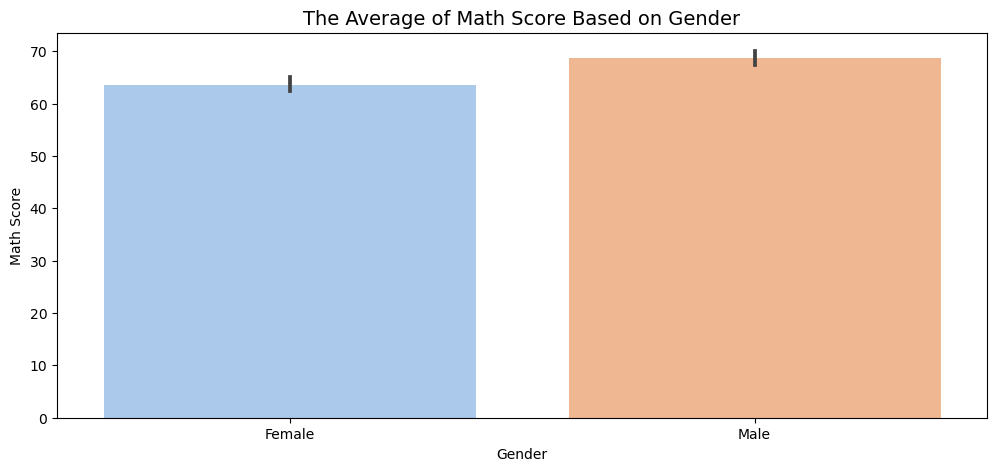

In [234]:
plt.figure(figsize = (12, 5))
sns.barplot(data = df, x = "Gender", y = "Math Score", palette = "pastel")
plt.title("The Average of Math Score Based on Gender", fontsize = 14)
plt.ylabel("Math Score", fontsize = 10)
plt.xlabel("Gender", fontsize = 10)
plt.show()

### The Average of Reading Score Based on Gender

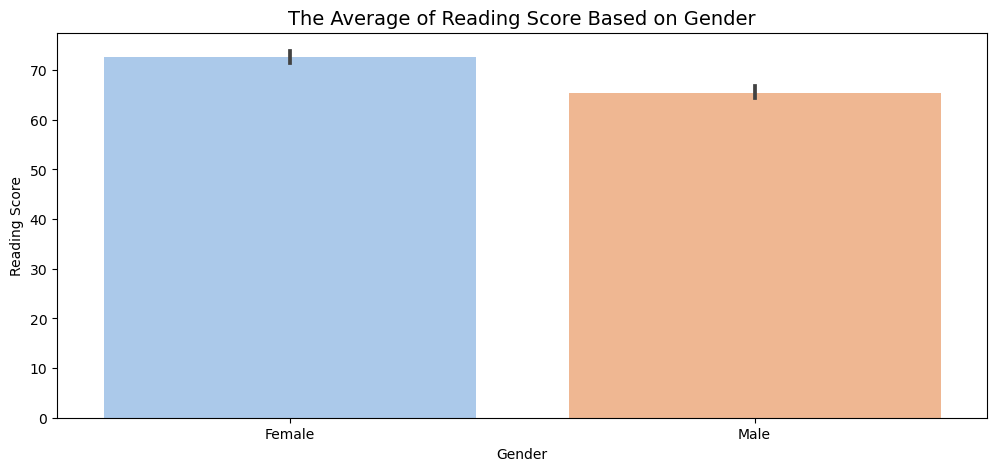

In [235]:
plt.figure(figsize = (12, 5))
sns.barplot(data = df, x = "Gender", y = "Reading Score", palette = "pastel")
plt.title("The Average of Reading Score Based on Gender", fontsize = 14)
plt.ylabel("Reading Score", fontsize = 10)
plt.xlabel("Gender", fontsize = 10)
plt.show()

### The Average of Writing Score Based on Gender

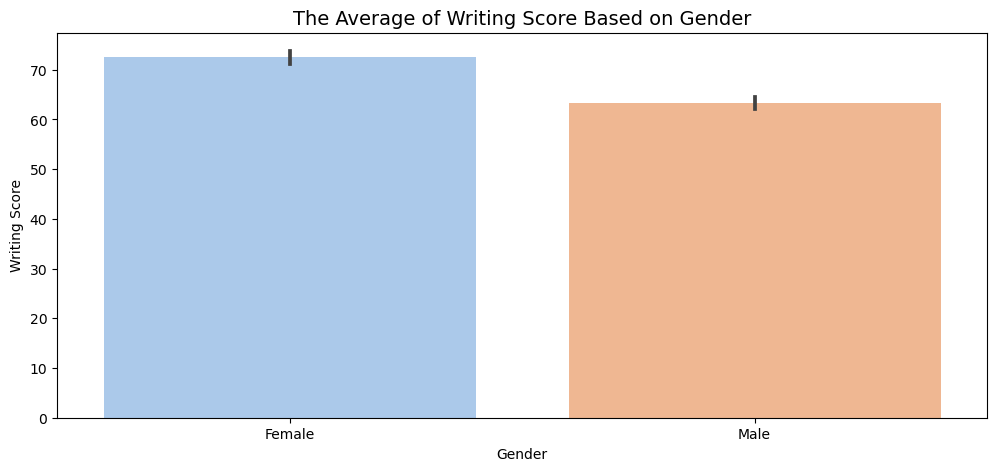

In [236]:
plt.figure(figsize = (12, 5))
sns.barplot(data = df, x = "Gender", y = "Writing Score", palette = "pastel")
plt.title("The Average of Writing Score Based on Gender", fontsize = 14)
plt.ylabel("Writing Score", fontsize = 10)
plt.xlabel("Gender", fontsize = 10)
plt.show()

### The Average of Math Score Based on Race/Ethnicity

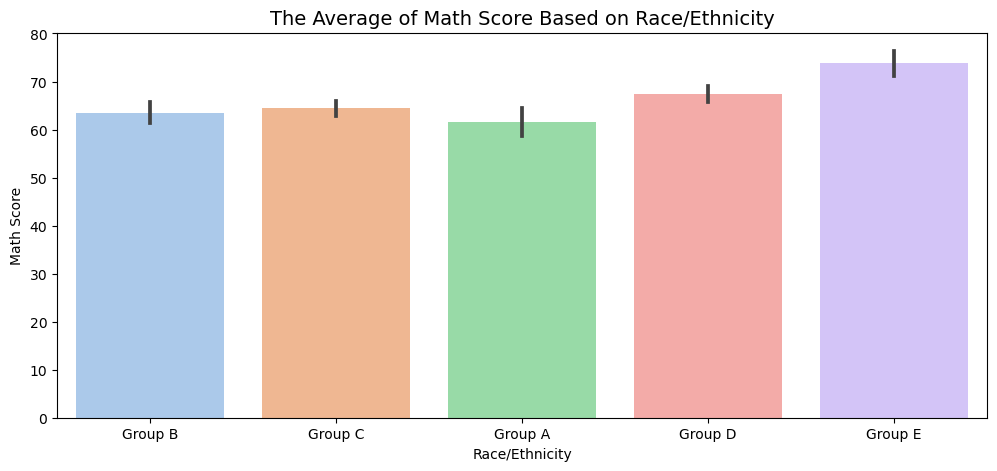

In [237]:
plt.figure(figsize = (12, 5))
sns.barplot(data = df, x = "Race/Ethnicity", y = "Math Score", palette = "pastel")
plt.title("The Average of Math Score Based on Race/Ethnicity", fontsize = 14)
plt.ylabel("Math Score", fontsize = 10)
plt.xlabel("Race/Ethnicity", fontsize = 10)
plt.show()

### The Average of Reading Score Based on Race/Ethnicity

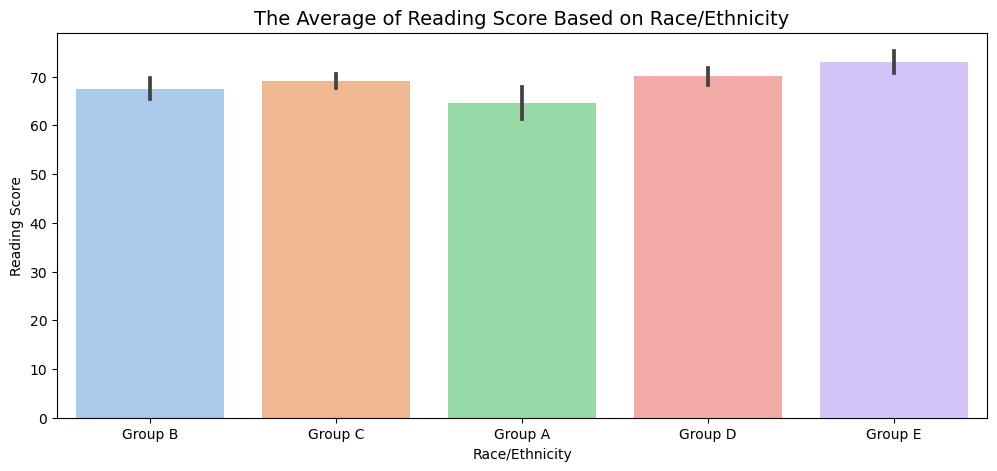

In [238]:
plt.figure(figsize = (12, 5))
sns.barplot(data = df, x = "Race/Ethnicity", y = "Reading Score", palette = "pastel")
plt.title("The Average of Reading Score Based on Race/Ethnicity", fontsize = 14)
plt.ylabel("Reading Score", fontsize = 10)
plt.xlabel("Race/Ethnicity", fontsize = 10)
plt.show()

### The Average of Writing Score Based on Race/Ethnicity

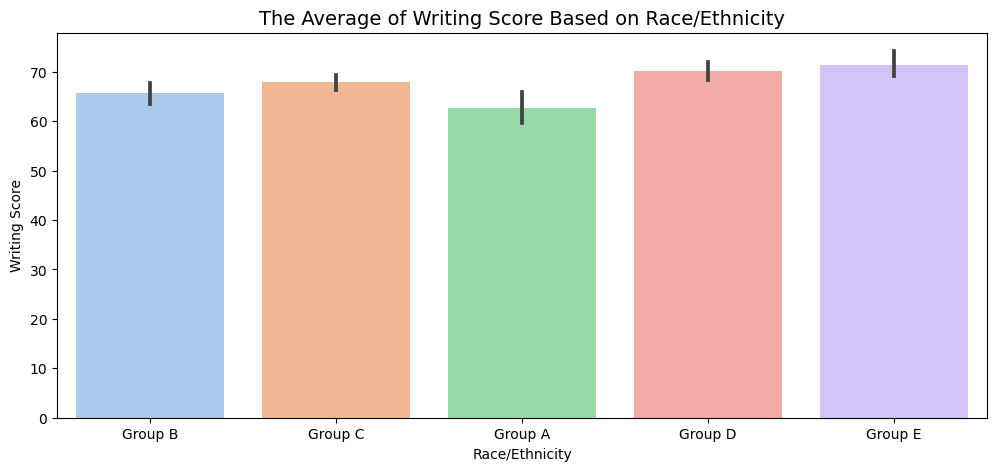

In [239]:
plt.figure(figsize = (12, 5))
sns.barplot(data = df, x = "Race/Ethnicity", y = "Writing Score", palette = "pastel")
plt.title("The Average of Writing Score Based on Race/Ethnicity", fontsize = 14)
plt.ylabel("Writing Score", fontsize = 10)
plt.xlabel("Race/Ethnicity", fontsize = 10)
plt.show()

### The Average of Math Score Based on Parent's Education

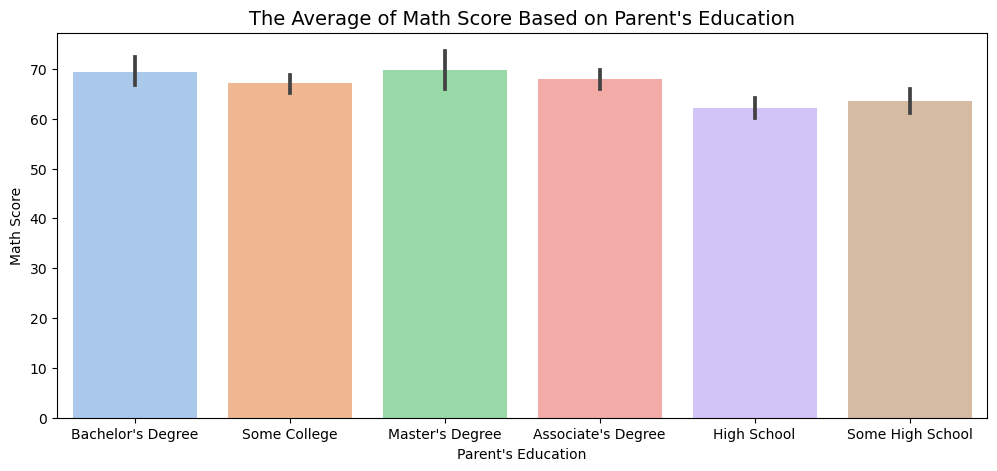

In [240]:
plt.figure(figsize = (12, 5))
sns.barplot(data = df, x = "Parent's Education", y = "Math Score", palette = "pastel")
plt.title("The Average of Math Score Based on Parent's Education", fontsize = 14)
plt.ylabel("Math Score", fontsize = 10)
plt.xlabel("Parent's Education", fontsize = 10)
plt.show()

### The Average of Reading Score Based on Parent's Education

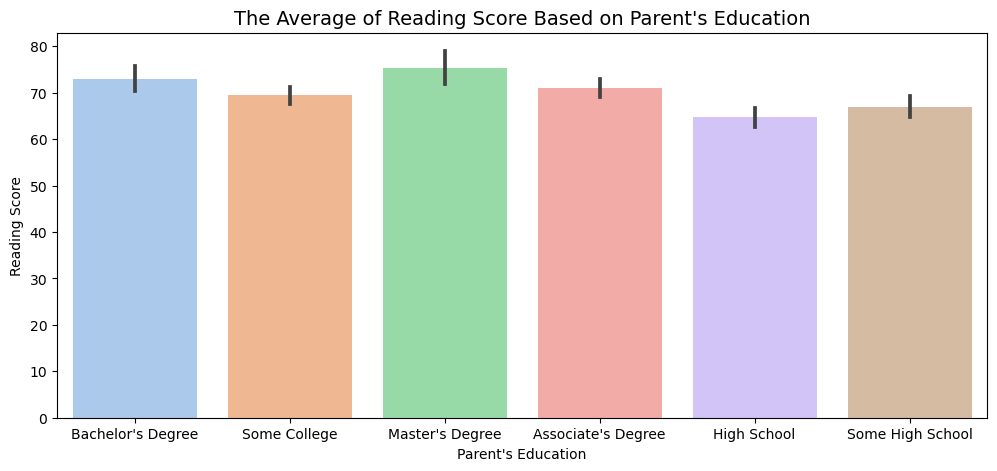

In [241]:
plt.figure(figsize = (12, 5))
sns.barplot(data = df, x = "Parent's Education", y = "Reading Score", palette = "pastel")
plt.title("The Average of Reading Score Based on Parent's Education", fontsize = 14)
plt.ylabel("Reading Score", fontsize = 10)
plt.xlabel("Parent's Education", fontsize = 10)
plt.show()

### The Average of Writing Score Based on Parent's Education

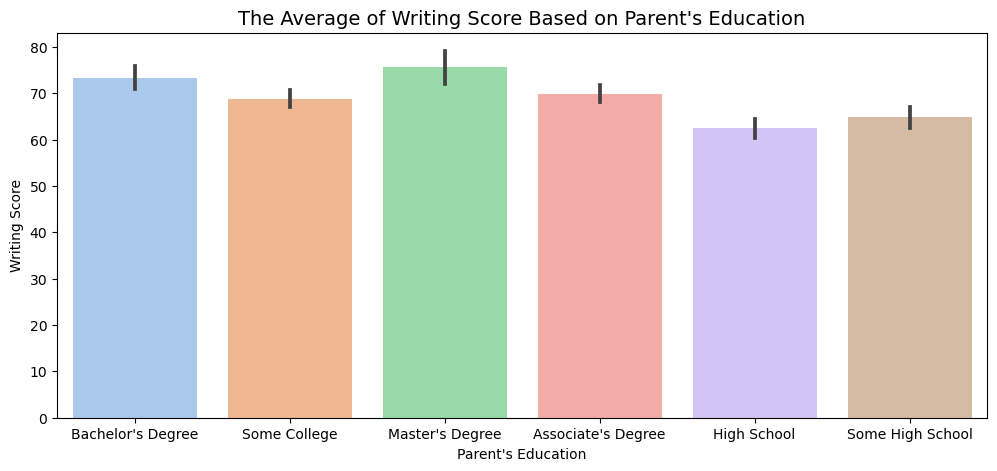

In [242]:
plt.figure(figsize = (12, 5))
sns.barplot(data = df, x = "Parent's Education", y = "Writing Score", palette = "pastel")
plt.title("The Average of Writing Score Based on Parent's Education", fontsize = 14)
plt.ylabel("Writing Score", fontsize = 10)
plt.xlabel("Parent's Education", fontsize = 10)
plt.show()

### The Average of Math Score Based on Lunch

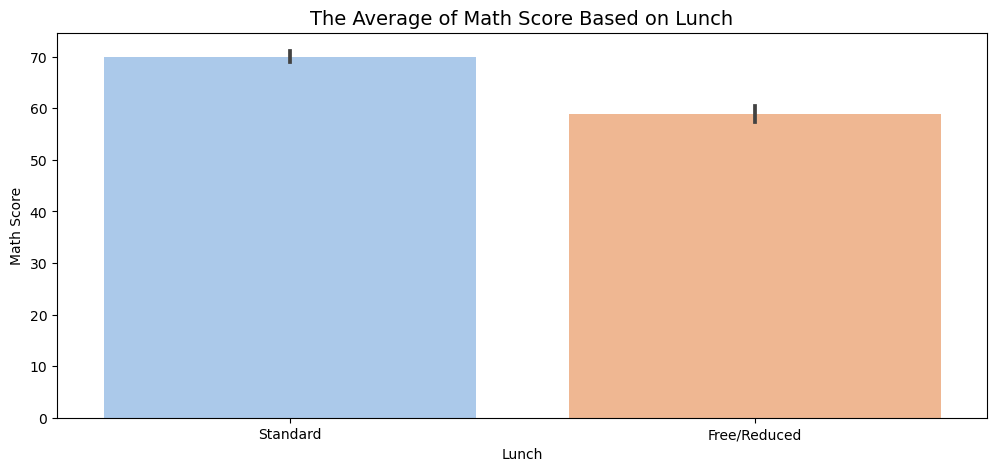

In [243]:
plt.figure(figsize = (12, 5))
sns.barplot(data = df, x = "Lunch", y = "Math Score", palette = "pastel")
plt.title("The Average of Math Score Based on Lunch", fontsize = 14)
plt.ylabel("Math Score", fontsize = 10)
plt.xlabel("Lunch", fontsize = 10)
plt.show()

### The Average of Reading Score Based on Lunch

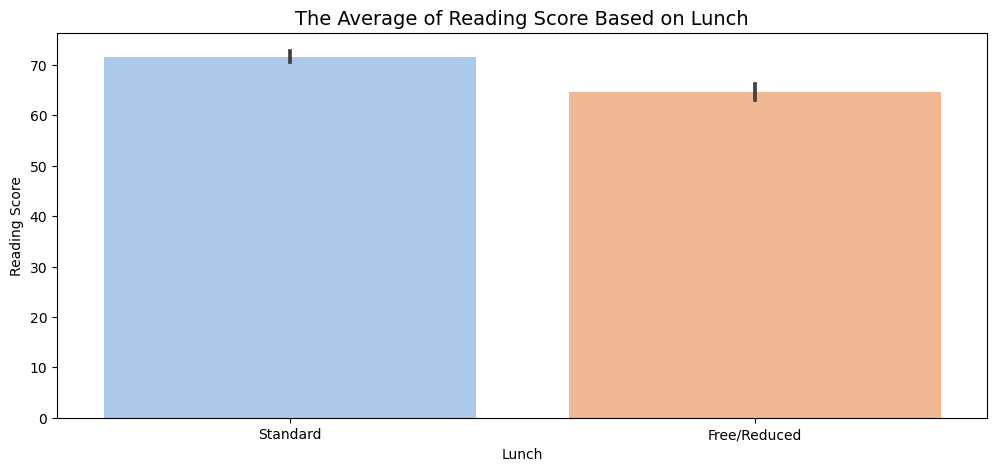

In [244]:
plt.figure(figsize = (12, 5))
sns.barplot(data = df, x = "Lunch", y = "Reading Score", palette = "pastel")
plt.title("The Average of Reading Score Based on Lunch", fontsize = 14)
plt.ylabel("Reading Score", fontsize = 10)
plt.xlabel("Lunch", fontsize = 10)
plt.show()

### The Average of Writing Score Based on Lunch

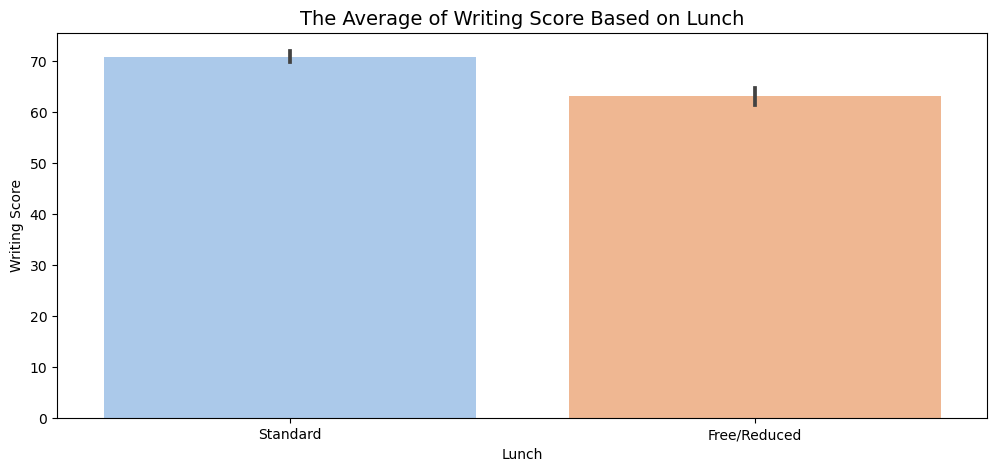

In [245]:
plt.figure(figsize = (12, 5))
sns.barplot(data = df, x = "Lunch", y = "Writing Score", palette = "pastel")
plt.title("The Average of Writing Score Based on Lunch", fontsize = 14)
plt.ylabel("Writing Score", fontsize = 10)
plt.xlabel("Lunch", fontsize = 10)
plt.show()

### The Average of Math Score Based on Test Preparation Course

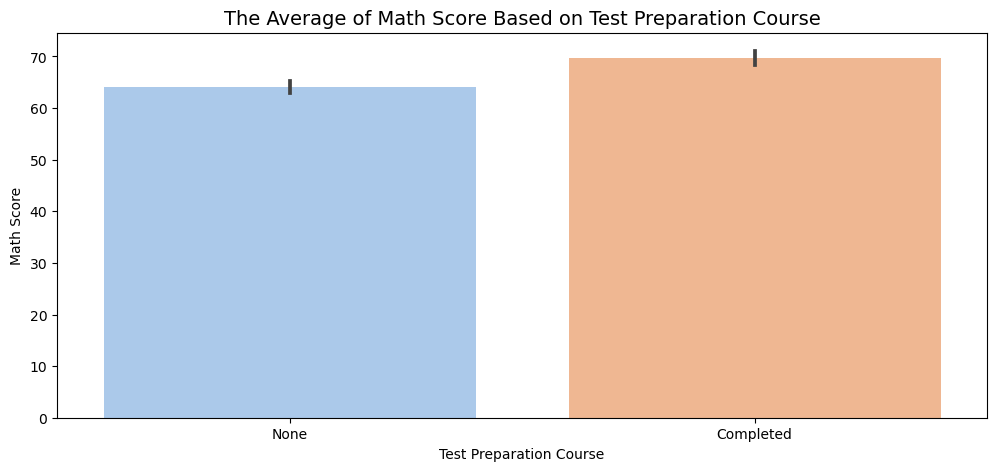

In [246]:
plt.figure(figsize = (12, 5))
sns.barplot(data = df, x = "Test Preparation Course", y = "Math Score", palette = "pastel")
plt.title("The Average of Math Score Based on Test Preparation Course", fontsize = 14)
plt.ylabel("Math Score", fontsize = 10)
plt.xlabel("Test Preparation Course", fontsize = 10)
plt.show()

### The Average of Reading Score Based on Test Preparation Course

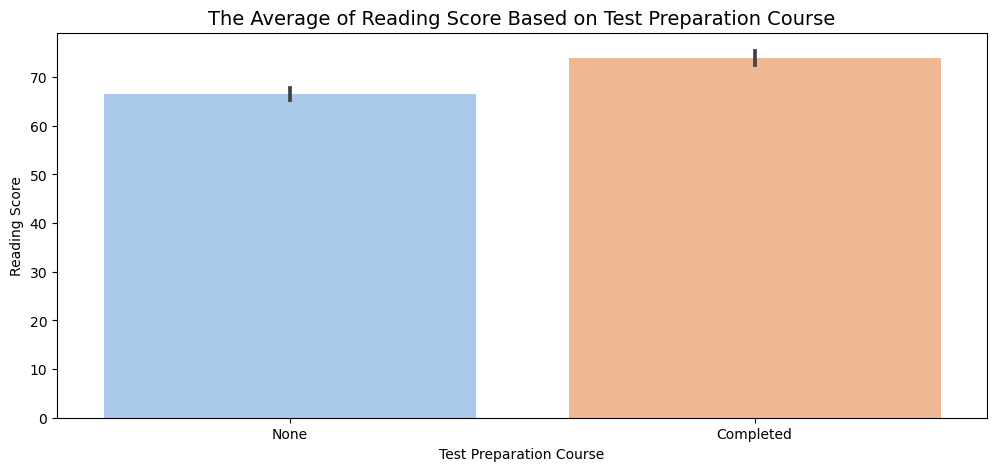

In [247]:
plt.figure(figsize = (12, 5))
sns.barplot(data = df, x = "Test Preparation Course", y = "Reading Score", palette = "pastel")
plt.title("The Average of Reading Score Based on Test Preparation Course", fontsize = 14)
plt.ylabel("Reading Score", fontsize = 10)
plt.xlabel("Test Preparation Course", fontsize = 10)
plt.show()

### The Average of Writing Score Based on Test Preparation Course

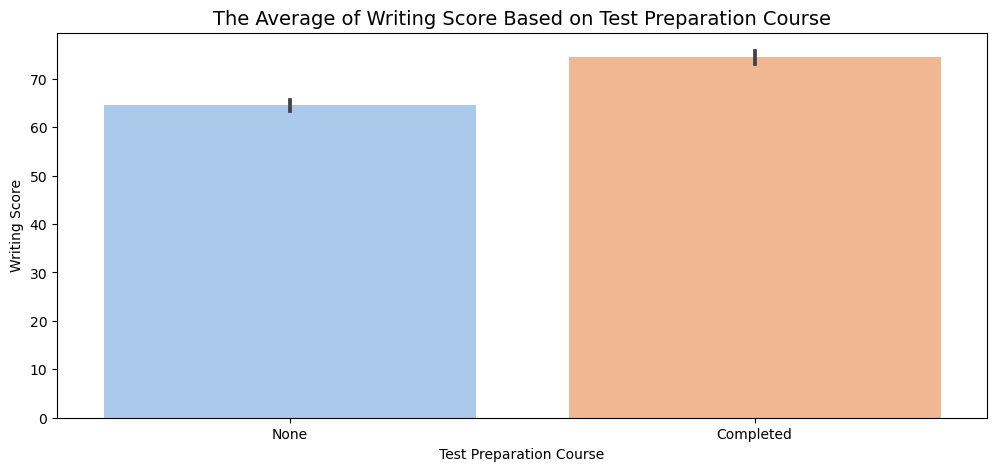

In [248]:
plt.figure(figsize = (12, 5))
sns.barplot(data = df, x = "Test Preparation Course", y = "Writing Score", palette = "pastel")
plt.title("The Average of Writing Score Based on Test Preparation Course", fontsize = 14)
plt.ylabel("Writing Score", fontsize = 10)
plt.xlabel("Test Preparation Course", fontsize = 10)
plt.show()